# **General overview of data**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import important libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Load the dataset 

data = pd.read_excel('/content/drive/MyDrive/IVF_Final_Dataset.xlsx')

In [ ]:
#Identifying the size of the aquired dataset 
print(data.shape)

(228, 43)


In [ ]:
#Displaying random 5 records 
data.sample(5)

,S.NO,PATIENT NAME,HUSBAND NAME,AGE(F),AGE(M),DURATION OF INFERTILITY (YEARS),EDUCATIONAL LEVEL OF THE WOMAN,PREVIOUS PREGNANCY,"IF YES, PREVIOUS MISCARRIAGE",IF YES MISCARRIAGE CAUSED,...,IVF TREATMENT,NO.OF OOCYTES RETRIEVED,NO.OF EMBRYOS TRANSFERRED,MALE FACTOR ONLY,SEVERE MALE FACTOR,FEMALE FACTOR ONLY,COMBINED FACTOR,UNKNOWN FACTOR,PLACE,COMMENTS
105,106,NIROSHAANI,SIVASUBRAMANIYAN,20-30,31-40,3,-,NO,NO,NO,...,SUCCESS,7,3,NO,NO,NO,NO,NO,TRICHY,NaN
149,150,RAMANI SRI,RAJAGOPAL,31-40,>40,10,10TH,YES,YES,SPONTANEOUS CONCEPTION,...,NO SUCCESS,5,3,YES,NO,NO,NO,NO,COIMBATORE,NaN
207,208,TAMILSELVI,ANNAVI,Above 40,Above 40,30,-,YES,YES,-,...,UNSUCCESS,8,4,NO,NO,NO,YES,YES,TRICHY,NaN
12,13,LOGESWARI,ANJANENJAN,20-30,31-40,5,NaN,NO,NO,NO,...,NO SUCCESS,7,2,NO,NO,NO,NO,YES,TRICHY,NaN
56,57,KAMALAM,KANNAN,>40,>40,15,DOCTOR,NO,NO,NO,...,SUCCESS,6,3,NO,NO,YES,NO,NO,COIMBATORE,NaN


In [ ]:
#Displaying the various attributes collected in our dataset 
data.columns

Index(['S.NO', 'PATIENT NAME', 'HUSBAND NAME', 'AGE(F)', 'AGE(M)',
       'DURATION OF INFERTILITY (YEARS)', 'EDUCATIONAL LEVEL OF THE WOMAN',
       'PREVIOUS PREGNANCY', 'IF YES, PREVIOUS MISCARRIAGE',
       'IF YES MISCARRIAGE CAUSED', 'MEDICAL DISORDERS', 'PREVIOUS SURGERY',
       'BMI(F)', 'PRE-EXISTING SYMPTOMS OF DEPRESSION',
       'FEAR AND NEGATIVE TREATMENT ATTITUDE',
       'PSYCHOLOGICAL AND EMOTIONAL FACTORS',
       'DIFFICULTY IN TOLEARATING NEGATIVE EMOTIONS FOR EXTENDED TIME',
       'UNCERTAINTY', 'STRAIN OF REPEATED TREATMENT', 'ENDOMETRIOSIS',
       'STAGES', 'TUBAL INFERTILITY', 'OVULATORY FACTOR', 'HORMONAL FACTOR',
       'CERVICAL FACTOR', 'UNEXPLAINED FACTOR', 'SEMEN EJACULATE VOLUME',
       'LIQUEFACTION TIME', 'GROSS AND MICROSCOPIC APPEARANCE',
       'SPERM CONCENTRATION', 'SPERM MOTILITY', 'SPERM VITALITY',
       'SPERM MORPHOLOGY', 'IVF TREATMENT', 'NO.OF OOCYTES RETRIEVED',
       'NO.OF EMBRYOS TRANSFERRED', 'MALE FACTOR ONLY', 'SEVERE MALE FACTOR

In [ ]:
#Understanding the kind of information eat column contains 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 43 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   S.NO                                                           228 non-null    int64  
 1   PATIENT NAME                                                   228 non-null    object 
 2   HUSBAND NAME                                                   228 non-null    object 
 3   AGE(F)                                                         228 non-null    object 
 4   AGE(M)                                                         228 non-null    object 
 5   DURATION OF INFERTILITY (YEARS)                                228 non-null    object 
 6   EDUCATIONAL LEVEL OF THE WOMAN                                 168 non-null    object 
 7   PREVIOUS PREGNANCY                                            

In [ ]:
#We reduce the number of columns by eliminating the non relevant columns like patient name, comments, place etc 
data.drop("PATIENT NAME", axis=1, inplace=True) 
data.drop("HUSBAND NAME", axis=1, inplace=True)
data.drop("PLACE", axis=1, inplace=True)
data.drop("COMMENTS", axis=1, inplace=True)
data.drop("S.NO", axis=1, inplace=True)


In [ ]:
#we have succesfully removed the irrelevant columns 
data.columns

Index(['AGE(F)', 'AGE(M)', 'DURATION OF INFERTILITY (YEARS)',
       'EDUCATIONAL LEVEL OF THE WOMAN', 'PREVIOUS PREGNANCY',
       'IF YES, PREVIOUS MISCARRIAGE', 'IF YES MISCARRIAGE CAUSED',
       'MEDICAL DISORDERS', 'PREVIOUS SURGERY', 'BMI(F)',
       'PRE-EXISTING SYMPTOMS OF DEPRESSION',
       'FEAR AND NEGATIVE TREATMENT ATTITUDE',
       'PSYCHOLOGICAL AND EMOTIONAL FACTORS',
       'DIFFICULTY IN TOLEARATING NEGATIVE EMOTIONS FOR EXTENDED TIME',
       'UNCERTAINTY', 'STRAIN OF REPEATED TREATMENT', 'ENDOMETRIOSIS',
       'STAGES', 'TUBAL INFERTILITY', 'OVULATORY FACTOR', 'HORMONAL FACTOR',
       'CERVICAL FACTOR', 'UNEXPLAINED FACTOR', 'SEMEN EJACULATE VOLUME',
       'LIQUEFACTION TIME', 'GROSS AND MICROSCOPIC APPEARANCE',
       'SPERM CONCENTRATION', 'SPERM MOTILITY', 'SPERM VITALITY',
       'SPERM MORPHOLOGY', 'IVF TREATMENT', 'NO.OF OOCYTES RETRIEVED',
       'NO.OF EMBRYOS TRANSFERRED', 'MALE FACTOR ONLY', 'SEVERE MALE FACTOR',
       'FEMALE FACTOR ONLY', 'COMBINE

In [ ]:
# Function for determining the number and percentages of missing values

def missing (data):
    missing_number = data.isnull().sum().sort_values(ascending=False)
    missing_percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values


In [ ]:
missing(data)

,Missing_Number,Missing_Percent
GROSS AND MICROSCOPIC APPEARANCE,170,0.745614
BMI(F),110,0.482456
FEAR AND NEGATIVE TREATMENT ATTITUDE,88,0.385965
STRAIN OF REPEATED TREATMENT,88,0.385965
UNCERTAINTY,88,0.385965
DIFFICULTY IN TOLEARATING NEGATIVE EMOTIONS FOR EXTENDED TIME,88,0.385965
PSYCHOLOGICAL AND EMOTIONAL FACTORS,88,0.385965
HORMONAL FACTOR,60,0.263158
EDUCATIONAL LEVEL OF THE WOMAN,60,0.263158
MEDICAL DISORDERS,58,0.254386


From the above table we can understand that 'Gross and Microscopic Appearance' column has the most percentage of missing values. 
Further we have columns like 'Stages' , 'Strain of repeated treatment', 'uncertainity', 'difficulty in tolerating negative emotions' etc. 
Therefore we ca conclude that our dataset has quite a few missing values. 



# **Handling Missing Values**

We are aware that we can handle missing values in three ways: 
1. Dropping columns 
2. Imputing values 
3. Treating missing values as a separate category 

In [ ]:
'''
we will be dropping columns like educational level, difficulty in handling negative emotions, fear and negative treatment attitude.
as learnt from previous research these attributes dont have any effect on the success rate of ivf.
'''
data.drop("DIFFICULTY IN TOLEARATING NEGATIVE EMOTIONS FOR EXTENDED TIME", axis=1, inplace=True) 
data.drop("FEAR AND NEGATIVE TREATMENT ATTITUDE", axis=1, inplace=True)
data.drop("EDUCATIONAL LEVEL OF THE WOMAN", axis=1, inplace=True)

In [ ]:
#the irrrelevant columns are removed 
data.columns

Index(['AGE(F)', 'AGE(M)', 'DURATION OF INFERTILITY (YEARS)',
       'PREVIOUS PREGNANCY', 'IF YES, PREVIOUS MISCARRIAGE',
       'IF YES MISCARRIAGE CAUSED', 'MEDICAL DISORDERS', 'PREVIOUS SURGERY',
       'BMI(F)', 'PRE-EXISTING SYMPTOMS OF DEPRESSION',
       'PSYCHOLOGICAL AND EMOTIONAL FACTORS', 'UNCERTAINTY',
       'STRAIN OF REPEATED TREATMENT', 'ENDOMETRIOSIS', 'STAGES',
       'TUBAL INFERTILITY', 'OVULATORY FACTOR', 'HORMONAL FACTOR',
       'CERVICAL FACTOR', 'UNEXPLAINED FACTOR', 'SEMEN EJACULATE VOLUME',
       'LIQUEFACTION TIME', 'GROSS AND MICROSCOPIC APPEARANCE',
       'SPERM CONCENTRATION', 'SPERM MOTILITY', 'SPERM VITALITY',
       'SPERM MORPHOLOGY', 'IVF TREATMENT', 'NO.OF OOCYTES RETRIEVED',
       'NO.OF EMBRYOS TRANSFERRED', 'MALE FACTOR ONLY', 'SEVERE MALE FACTOR',
       'FEMALE FACTOR ONLY', 'COMBINED FACTOR', 'UNKNOWN FACTOR'],
      dtype='object')

In the above columns for a few comlumns we handle the missing values by creating a new category. 
Simultaneously we also handle the non uniformity in these columns. For example,'Psychological and Emotional Factors'column has dashes, yes and no. So we convert all the dashes to no. 

For the 'Combined Factor', 'Previous Surgery', 'Psychological and Emotional Factors', 'Pre-Existing symptoms of depression', 'Medical Disorders','Uncertainity' we treat the missing values as 'NO' 


In [ ]:
data['PREVIOUS SURGERY'] = data['PREVIOUS SURGERY'].fillna('NO')
data['COMBINED FACTOR'] = data['COMBINED FACTOR'].fillna('NO')
data['PSYCHOLOGICAL AND EMOTIONAL FACTORS'] = data['PSYCHOLOGICAL AND EMOTIONAL FACTORS'].fillna('NO')
data['PRE-EXISTING SYMPTOMS OF DEPRESSION'] = data['PRE-EXISTING SYMPTOMS OF DEPRESSION'].fillna('NO')
data['MEDICAL DISORDERS'] = data['MEDICAL DISORDERS'].fillna('NO')
data['UNCERTAINTY'] = data['UNCERTAINTY'].fillna('NO')
data['IF YES, PREVIOUS MISCARRIAGE'] = data['IF YES, PREVIOUS MISCARRIAGE'].fillna('NO')

In [ ]:
#checking missing data 
missing(data)

,Missing_Number,Missing_Percent
GROSS AND MICROSCOPIC APPEARANCE,170,0.745614
BMI(F),110,0.482456
STRAIN OF REPEATED TREATMENT,88,0.385965
HORMONAL FACTOR,60,0.263158
NO.OF EMBRYOS TRANSFERRED,25,0.109649
NO.OF OOCYTES RETRIEVED,25,0.109649
SPERM VITALITY,0,0.000000
LIQUEFACTION TIME,0,0.000000
SPERM CONCENTRATION,0,0.000000
SPERM MOTILITY,0,0.000000


In [ ]:
data['MEDICAL DISORDERS'] = data['MEDICAL DISORDERS'].replace('-', 'NO')
data['PREVIOUS SURGERY'] = data['PREVIOUS SURGERY'].replace('-', 'NO')
data['PSYCHOLOGICAL AND EMOTIONAL FACTORS'] = data['PSYCHOLOGICAL AND EMOTIONAL FACTORS'].replace('-', 'NO')
data['STRAIN OF REPEATED TREATMENT'] = data['STRAIN OF REPEATED TREATMENT'].replace('-', 'NO')
data['HORMONAL FACTOR'] = data['HORMONAL FACTOR'].replace('-', 'NO')
data['IVF TREATMENT'] = data['IVF TREATMENT'].replace('-', 'NO')
data['NO.OF OOCYTES RETRIEVED'] = data['NO.OF OOCYTES RETRIEVED'].replace('-', ' ')
data['IF YES MISCARRIAGE CAUSED'] = data['IF YES MISCARRIAGE CAUSED'].replace('-', 'NO')
data['IF YES MISCARRIAGE CAUSED'] = data['IF YES MISCARRIAGE CAUSED'].replace(' ', 'NO')
data['STAGES'] = data['STAGES'].replace(' ',0)



We will be using imputation to handle the missing values for the remaining columns. 
Since the missing percentage is fairly low for no.of embryos transferred and no.of ooyoctyes retrieved. Therefore we will be using mean or median imputation. To assess which will be better suited we first understand the distribution 

In [ ]:
# Replace missing values with NaN
data['NO.OF OOCYTES RETRIEVED'] = pd.to_numeric(data['NO.OF OOCYTES RETRIEVED'], errors='coerce')
import numpy as np
# Calculate variance
variance = np.var(data['NO.OF OOCYTES RETRIEVED'].dropna())
print(variance)

25.595061728395063


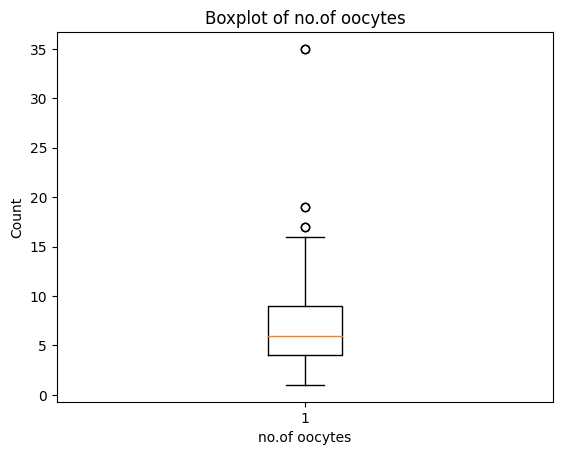

In [ ]:
plt.boxplot(data["NO.OF OOCYTES RETRIEVED"].dropna())

# Set the title and labels
plt.title("Boxplot of no.of oocytes")
plt.xlabel("no.of oocytes")
plt.ylabel("Count")

# Display the plot
plt.show()

In [ ]:
#since it is a positively skewed distribution its better to use median imputation 
import numpy as np
from sklearn.impute import SimpleImputer

# Select the column with missing values and negative skew distribution
missing_values = data['NO.OF OOCYTES RETRIEVED'].isnull().sum()

# Print the number of missing values before imputation
print("Number of missing values before imputation:", missing_values)

# Compute the median of the column
median = np.median(data['NO.OF OOCYTES RETRIEVED'])

# Replace the missing values with the median using SimpleImputer
imputer = SimpleImputer(strategy='median')
data['NO.OF OOCYTES RETRIEVED'] = imputer.fit_transform(data[['NO.OF OOCYTES RETRIEVED']])

# Print the number of missing values after imputation
missing_values = data['NO.OF OOCYTES RETRIEVED'].isnull().sum()
print("Number of missing values after imputation:", missing_values)

Number of missing values before imputation: 48
Number of missing values after imputation: 0


In [ ]:
# Replace missing values with NaN
data['NO.OF EMBRYOS TRANSFERRED'] = pd.to_numeric(data['NO.OF EMBRYOS TRANSFERRED'], errors='coerce')
import numpy as np
# Calculate variance
variance = np.var(data['NO.OF EMBRYOS TRANSFERRED'].dropna())
print(variance)

1.143333333333333


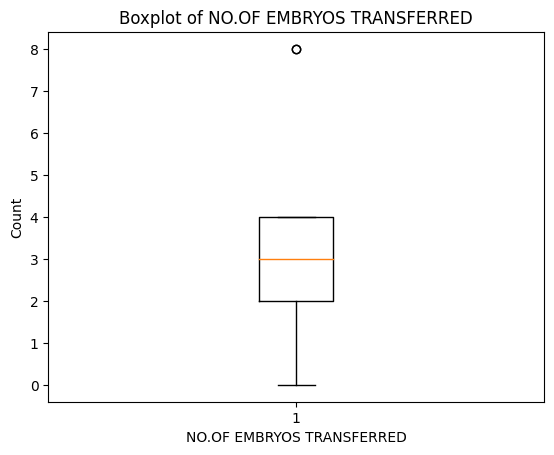

In [ ]:
plt.boxplot(data["NO.OF EMBRYOS TRANSFERRED"].dropna())

# Set the title and labels
plt.title("Boxplot of NO.OF EMBRYOS TRANSFERRED")
plt.xlabel("NO.OF EMBRYOS TRANSFERRED")
plt.ylabel("Count")

# Display the plot
plt.show()

In [ ]:
#since the distribution is normal distribution we use mean imputation 

# Calculate the mean value
mean_embryos_transferred = data['NO.OF EMBRYOS TRANSFERRED'].mean()

# Replace missing values with mean
data['NO.OF EMBRYOS TRANSFERRED'].fillna(mean_embryos_transferred, inplace=True)

In [ ]:
missing(data)

,Missing_Number,Missing_Percent
GROSS AND MICROSCOPIC APPEARANCE,170,0.745614
BMI(F),110,0.482456
STRAIN OF REPEATED TREATMENT,88,0.385965
HORMONAL FACTOR,60,0.263158
SPERM MORPHOLOGY,0,0.000000
LIQUEFACTION TIME,0,0.000000
SPERM CONCENTRATION,0,0.000000
SPERM MOTILITY,0,0.000000
SPERM VITALITY,0,0.000000
IVF TREATMENT,0,0.000000


In [ ]:
#To impute the strain of repeated treatment, since it consists of categorical variables therefore we use mode imputation 
data['STRAIN OF REPEATED TREATMENT'] = data['STRAIN OF REPEATED TREATMENT'].fillna(data['STRAIN OF REPEATED TREATMENT'].mode()[0])

In [ ]:
#replacing dashes with no in strain of treatment column 
data['STRAIN OF REPEATED TREATMENT'] = data['STRAIN OF REPEATED TREATMENT'].replace('-', 'NO')

In [ ]:
missing(data)

,Missing_Number,Missing_Percent
GROSS AND MICROSCOPIC APPEARANCE,170,0.745614
BMI(F),110,0.482456
HORMONAL FACTOR,60,0.263158
SPERM MORPHOLOGY,0,0.000000
SEMEN EJACULATE VOLUME,0,0.000000
LIQUEFACTION TIME,0,0.000000
SPERM CONCENTRATION,0,0.000000
SPERM MOTILITY,0,0.000000
SPERM VITALITY,0,0.000000
IVF TREATMENT,0,0.000000


In [ ]:
#handling missing values in hormonal factor using mode imputation 
data['HORMONAL FACTOR'] = data['HORMONAL FACTOR'].fillna(data['HORMONAL FACTOR'].mode()[0])

In [ ]:
missing(data)

,Missing_Number,Missing_Percent
GROSS AND MICROSCOPIC APPEARANCE,170,0.745614
BMI(F),110,0.482456
AGE(F),0,0.000000
SPERM MORPHOLOGY,0,0.000000
SEMEN EJACULATE VOLUME,0,0.000000
LIQUEFACTION TIME,0,0.000000
SPERM CONCENTRATION,0,0.000000
SPERM MOTILITY,0,0.000000
SPERM VITALITY,0,0.000000
IVF TREATMENT,0,0.000000


In [ ]:
#imputing the values in 'Gross and Microscopic Appearence' Column by mode imputation 
# Replace missing values with NaN
data['GROSS AND MICROSCOPIC APPEARANCE'].replace('-', np.nan, inplace=True)

# Calculate the mode value
mode_value = data['GROSS AND MICROSCOPIC APPEARANCE'].mode()[0]

# Impute the missing values with mode value
data['GROSS AND MICROSCOPIC APPEARANCE'].fillna(mode_value, inplace=True)


In [ ]:
missing(data)

,Missing_Number,Missing_Percent
BMI(F),110,0.482456
AGE(F),0,0.000000
SPERM MORPHOLOGY,0,0.000000
SEMEN EJACULATE VOLUME,0,0.000000
LIQUEFACTION TIME,0,0.000000
GROSS AND MICROSCOPIC APPEARANCE,0,0.000000
SPERM CONCENTRATION,0,0.000000
SPERM MOTILITY,0,0.000000
SPERM VITALITY,0,0.000000
IVF TREATMENT,0,0.000000


In [ ]:
# extract the unique values in the BMI(f) column
unique_values = data['BMI(F)'].unique()

# print the unique values
print(unique_values)

[nan  1.  3.  2.  0.]


Where,
- 0= underweight
- 1= healthy
- 2= overweight
- 3= obese

In [ ]:
# Calculate the mode value
mode_value= data['BMI(F)'].mode()[0]
# Impute the missing values with mode value
data['BMI(F)'].fillna(mode_value, inplace=True)

In [ ]:
missing(data)

,Missing_Number,Missing_Percent
AGE(F),0,0.0
SPERM MORPHOLOGY,0,0.0
SEMEN EJACULATE VOLUME,0,0.0
LIQUEFACTION TIME,0,0.0
GROSS AND MICROSCOPIC APPEARANCE,0,0.0
SPERM CONCENTRATION,0,0.0
SPERM MOTILITY,0,0.0
SPERM VITALITY,0,0.0
IVF TREATMENT,0,0.0
CERVICAL FACTOR,0,0.0


**Thus, we have handled all the missing values.**

#**Data Standardization**

In [ ]:
#We convert the fractional values from "Duration of infertility" column to decimal values 

convert_fraction_to_decimal = lambda x: float(x.replace(' ', '').split('/')[0]) / float(x.replace(' ', '').split('/')[1]) if '/' in str(x) else x

# Apply the lambda function to the "Duration of Infertility (Years)" column
data['DURATION OF INFERTILITY (YEARS)'] = data['DURATION OF INFERTILITY (YEARS)'].apply(convert_fraction_to_decimal)

data.to_excel('IVF_Final_Dataset.xlsx', index=False)

#**Exploratory Data Analysis**

#***Examination of numerical variables***

In [ ]:
#examining the numerical and categorical columns in the dataset
numerical= data.drop(['IVF TREATMENT'], axis=1).select_dtypes('number').columns

categorical = data.select_dtypes('object').columns

print(f'Numerical Columns:  {data[numerical].columns}')
print('\n')
print(f'Categorical Columns: {data[categorical].columns}')

Numerical Columns:  Index(['DURATION OF INFERTILITY (YEARS)', 'BMI(F)', 'STAGES',
       'NO.OF OOCYTES RETRIEVED', 'NO.OF EMBRYOS TRANSFERRED'],
      dtype='object')


Categorical Columns: Index(['AGE(F)', 'AGE(M)', 'PREVIOUS PREGNANCY',
       'IF YES, PREVIOUS MISCARRIAGE', 'IF YES MISCARRIAGE CAUSED',
       'MEDICAL DISORDERS', 'PREVIOUS SURGERY',
       'PRE-EXISTING SYMPTOMS OF DEPRESSION',
       'PSYCHOLOGICAL AND EMOTIONAL FACTORS', 'UNCERTAINTY',
       'STRAIN OF REPEATED TREATMENT', 'ENDOMETRIOSIS', 'TUBAL INFERTILITY',
       'OVULATORY FACTOR', 'HORMONAL FACTOR', 'CERVICAL FACTOR',
       'UNEXPLAINED FACTOR', 'SEMEN EJACULATE VOLUME', 'LIQUEFACTION TIME',
       'GROSS AND MICROSCOPIC APPEARANCE', 'SPERM CONCENTRATION',
       'SPERM MOTILITY', 'SPERM VITALITY', 'SPERM MORPHOLOGY', 'IVF TREATMENT',
       'MALE FACTOR ONLY', 'SEVERE MALE FACTOR', 'FEMALE FACTOR ONLY',
       'COMBINED FACTOR', 'UNKNOWN FACTOR'],
      dtype='object')


In [ ]:
#examining numerical columns by generating a visual representation of descriptive statistics for numerical data, allowing us identify 
#any outliers or unusual values in the data. Since we are working on a real-time medical dataset, we'll definately have outliers. 

data[numerical].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
DURATION OF INFERTILITY (YEARS),228.000000,7.600877,4.953608,1.000000,4.000000,7.000000,10.000000,30.000000
BMI(F),228.000000,0.570175,0.900018,0.000000,0.000000,0.000000,1.000000,3.000000
STAGES,228.000000,0.350877,0.860104,0.000000,0.000000,0.000000,0.000000,4.000000
NO.OF OOCYTES RETRIEVED,228.000000,6.964912,4.532661,1.000000,5.000000,6.000000,7.000000,35.000000
NO.OF EMBRYOS TRANSFERRED,228.000000,2.966667,0.952160,0.000000,2.966667,3.000000,3.000000,8.000000


The color gradient applied to the table highlights the values that are significantly different from the others in their respective columns. For example, in the 'NO.OF OOCYTES RETRIEVED' column, the maximum value of 35 is colored the darkest, indicating that it is an outlier compared to the other values in the column. The color gradient can help identify such outliers and other patterns in the data that might not be immediately apparent from looking at the raw numbers.

We examined outliers in our dataset and our data was scaled from about 256 rows to 42  rows only, so we didnt went forward with it as there is a chance of overfitting

#***Examination of Skewness and Kurtosis***

In [ ]:
skew_vals = data.skew().sort_values(ascending=False)
skew_vals

<ipython-input-38-30b1f4697c59>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skew_vals = data.skew().sort_values(ascending=False)


NO.OF OOCYTES RETRIEVED            2.686643
STAGES                             2.607964
DURATION OF INFERTILITY (YEARS)    1.383535
BMI(F)                             1.324121
NO.OF EMBRYOS TRANSFERRED          0.631124
dtype: float64

The skewness values provide information about the distributional asymmetry of each feature. A positive skewness value indicates that the distribution of the feature is skewed towards the right or has a long tail on the right side, while a negative skewness value indicates that the distribution is skewed towards the left or has a long tail on the left side.


> - Features like No. of Oocytes Retrived, Stages, Duration of infertility, BMI(F) which have high values of absolute skewness will affect the target variable i.e IVF TREATMENT more.
> - Features with moderate to high positive skewness values, such as 'DURATION OF INFERTILITY (YEARS)' and 'BMI(F)', may have distributions that are not symmetric and are shifted towards higher values. 



In [ ]:
skew_limit = 0.5 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = data.skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols 

<ipython-input-39-d1ba9815228f>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skew_vals = data.skew()


NO.OF OOCYTES RETRIEVED            2.686643
STAGES                             2.607964
DURATION OF INFERTILITY (YEARS)    1.383535
BMI(F)                             1.324121
NO.OF EMBRYOS TRANSFERRED          0.631124
dtype: float64

In [ ]:
kurtosis_vals = data.kurtosis().sort_values(ascending=False)
kurtosis_vals

<ipython-input-40-de5cd8c8f020>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis_vals = data.kurtosis().sort_values(ascending=False)


NO.OF OOCYTES RETRIEVED            12.001128
NO.OF EMBRYOS TRANSFERRED           6.496818
STAGES                              6.286729
DURATION OF INFERTILITY (YEARS)     3.143007
BMI(F)                              0.460815
dtype: float64

Kurtosis is a measure of the shape of the probability distribution of a feature. A positive kurtosis value indicates that the distribution of the feature has heavier tails and a more peaked center compared to a normal distribution, while a negative kurtosis value indicates that the distribution has lighter tails and a flatter center.

> - Features with moderate to high positive kurtosis values, such as 'DURATION OF INFERTILITY (YEARS)', may have distributions that are more peaked and heavy-tailed compared to a normal distribution.
- Features with high absolute kurtosis values like No.ooyctes retrived have greater impact on the target variable i.e IVF TREATMENT



In [ ]:
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

<ipython-input-42-08f2ebc29bd8>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



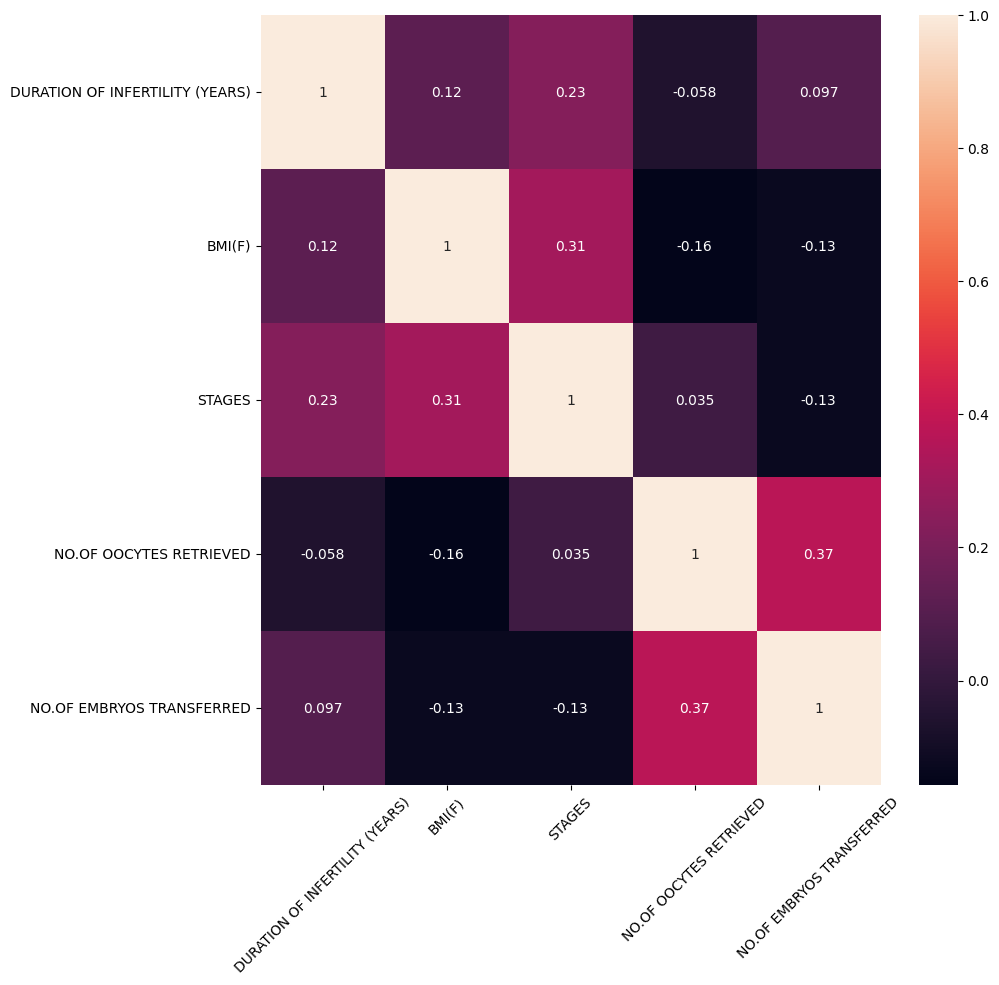

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)
plt.xticks(rotation=45);

In the heatmap generated by the code , warm colors (such as red or orange) indicate positive correlations, cool colors (such as blue or green) indicate negative correlations, and the darkness of the color indicates the strength of the correlation.

Specifically, the color scale used in the heatmap is a diverging color map with a range of colors from blue (indicating negative correlation) to white (indicating no correlation) to red (indicating positive correlation). The deeper the shade of blue or red, the stronger the correlation. The annotation in each cell of the heatmap provides the numeric value of the correlation coefficient, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation).

**Example of some inferences:**
- There is a strong positive correlation between "NO. OF OOCYTES RETRIEVED" and "NO. OF EMBRYOS TRANSFERRED", indicating that patients who had a higher number of eggs retrieved tend to have more embryos transferred.
-There is a moderate positive correlation between "AGE OF THE PATIENT" and "DURATION OF INFERTILITY (YEARS)", indicating that older patients tend to have a longer duration of infertility.
-There is a weak positive correlation between "BMI(F)" and "DURATION OF INFERTILITY (YEARS)", indicating that patients with higher BMI values tend to have a slightly longer duration of infertility.
-There is a weak positive correlation between "STAGES" and "DURATION OF INFERTILITY (YEARS)", indicating that patients with a higher stage of infertility tend to have a slightly longer duration of infertility.
-There is a weak negative correlation between "AGE OF THE PATIENT" and "BMI(F)", indicating that older patients tend to have a slightly lower BMI.
-There is a weak negative correlation between "AGE OF THE PATIENT" and "STAGES", indicating that older patients tend to have a slightly lower stage of infertility.
-There is a moderate negative correlation between "AGE OF THE PATIENT" and "NO. OF OOCYTES RETRIEVED", indicating that older patients tend to have fewer eggs retrieved.
-There is a weak negative correlation between "AGE OF THE PATIENT" and "NO. OF EMBRYOS TRANSFERRED", indicating that older patients tend to have slightly fewer embryos transferred.
-There is a weak negative correlation between "BMI(F)" and "NO. OF OOCYTES RETRIEVED", indicating that patients with higher BMI values tend to have slightly fewer eggs retrieved.
-There is a weak negative correlation between "STAGES" and "NO. OF OOCYTES RETRIEVED", indicating that patients with a higher stage of infertility tend to have slightly fewer eggs retrieved.
-There is a weak negative correlation between "STAGES" and "NO. OF EMBRYOS TRANSFERRED", indicating that patients with a higher stage of infertility tend to have slightly fewer embryos transferred.
-There is a weak positive correlation between "NO. OF OOCYTES RETRIEVED" and "BMI(F)", indicating that patients who had more eggs retrieved tend to have a slightly higher BMI.

In [ ]:

#checking for multicollinearity (phenomenon where two or more independent variables in a regression model are 
#highly correlated with each other) this can lead to problems in the 
#analysis and interpretation of the regression results, such as unstable 
#and unreliable parameter estimates, reduced predictive power, and difficulty in determining the relative importance of each variable. 
#Multicollinearity can also make it difficult to identify which 
#independent variable(s) are causing changes in the dependent variable.

data_temp = data.corr()

count = "Done"
feature =[]
collinear=[]
for col in data_temp.columns:
    for i in data_temp.index:
        if (data_temp[col][i]> .9 and data_temp[col][i] < 1) or (data_temp[col][i]< -.9 and data_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(Fore.RED + f"\033[1mmulticolinearity alert in between\033[0m {col} - {i}")
        else:
            print(f"For {col} and {i}, there is NO multicollinearity problem") 

print("\033[1mThe number of strong corelated features:\033[0m", count) 

For DURATION OF INFERTILITY (YEARS) and DURATION OF INFERTILITY (YEARS), there is NO multicollinearity problem
For DURATION OF INFERTILITY (YEARS) and BMI(F), there is NO multicollinearity problem
For DURATION OF INFERTILITY (YEARS) and STAGES, there is NO multicollinearity problem
For DURATION OF INFERTILITY (YEARS) and NO.OF OOCYTES RETRIEVED, there is NO multicollinearity problem
For DURATION OF INFERTILITY (YEARS) and NO.OF EMBRYOS TRANSFERRED, there is NO multicollinearity problem
For BMI(F) and DURATION OF INFERTILITY (YEARS), there is NO multicollinearity problem
For BMI(F) and BMI(F), there is NO multicollinearity problem
For BMI(F) and STAGES, there is NO multicollinearity problem
For BMI(F) and NO.OF OOCYTES RETRIEVED, there is NO multicollinearity problem
For BMI(F) and NO.OF EMBRYOS TRANSFERRED, there is NO multicollinearity problem
For STAGES and DURATION OF INFERTILITY (YEARS), there is NO multicollinearity problem
For STAGES and BMI(F), there is NO multicollinearity prob

<ipython-input-43-62a0df700592>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



The ouput clearly indicates that there are no instances of multicollinearity between the variables in the dataset. This is a positive sign for building a reliable predictive model for the success rate of IVF using machine learning.

#***Handling Categorical Variables***

In [ ]:
#First we check the number of categorical and numerical columns
# Get the data types of all columns
data_types = data.dtypes

# Filter columns with categorical data types and numerical datatypes 
categorical_cols = data_types[data_types == 'object'].index.tolist()
numerical_cols = data_types[data_types != 'object'].index.tolist()

# Display the list of categorical columns
print("Categorical columns in the dataset:")
print(categorical_cols)

# Display the list of numerical columns
print("Numerical columns in the dataset:")
print(numerical_cols)

Categorical columns in the dataset:
['AGE(F)', 'AGE(M)', 'PREVIOUS PREGNANCY', 'IF YES, PREVIOUS MISCARRIAGE', 'IF YES MISCARRIAGE CAUSED', 'MEDICAL DISORDERS', 'PREVIOUS SURGERY', 'PRE-EXISTING SYMPTOMS OF DEPRESSION', 'PSYCHOLOGICAL AND EMOTIONAL FACTORS', 'UNCERTAINTY', 'STRAIN OF REPEATED TREATMENT', 'ENDOMETRIOSIS', 'TUBAL INFERTILITY', 'OVULATORY FACTOR', 'HORMONAL FACTOR', 'CERVICAL FACTOR', 'UNEXPLAINED FACTOR', 'SEMEN EJACULATE VOLUME', 'LIQUEFACTION TIME', 'GROSS AND MICROSCOPIC APPEARANCE', 'SPERM CONCENTRATION', 'SPERM MOTILITY', 'SPERM VITALITY', 'SPERM MORPHOLOGY', 'IVF TREATMENT', 'MALE FACTOR ONLY', 'SEVERE MALE FACTOR', 'FEMALE FACTOR ONLY', 'COMBINED FACTOR', 'UNKNOWN FACTOR']
Numerical columns in the dataset:
['DURATION OF INFERTILITY (YEARS)', 'BMI(F)', 'STAGES', 'NO.OF OOCYTES RETRIEVED', 'NO.OF EMBRYOS TRANSFERRED']


In [ ]:
#Handling categorical values in 'IF YES MISCARRIAGE CAUSED' and standardizing the values 
# extract the unique values in the 'IF YES MISCARRIAGE CAUSED' column
unique_values = data['IF YES MISCARRIAGE CAUSED'].unique()

# print the unique values
print(unique_values)

['NO' 'SPONTANEOUS CONCEPTION' 'ASSISTED REPRODUCTIVE PROCEDURE'
 'SPONTANEOUS CONCEPTION,'
 'ASSISTED REPRODUCTIVE PROCEDURE, SPONTANEOUS CONCEPTION'
 'ASSISTED REPRODUCTIVE PROCEDURE,SPONTANEOUS CONCEPTION']


In [ ]:
#Now we convert all the reasons to YES 
data['IF YES MISCARRIAGE CAUSED'] = data['IF YES MISCARRIAGE CAUSED'].replace('SPONTANEOUS CONCEPTION', 'YES')
data['IF YES MISCARRIAGE CAUSED'] = data['IF YES MISCARRIAGE CAUSED'].replace('ASSISTED REPRODUCTIVE PROCEDURE', 'YES')
data['IF YES MISCARRIAGE CAUSED'] = data['IF YES MISCARRIAGE CAUSED'].replace('SPONTANEOUS CONCEPTION,', 'YES')
data['IF YES MISCARRIAGE CAUSED'] = data['IF YES MISCARRIAGE CAUSED'].replace('ASSISTED REPRODUCTIVE PROCEDURE,SPONTANEOUS CONCEPTION', 'YES')
data['IF YES MISCARRIAGE CAUSED'] = data['IF YES MISCARRIAGE CAUSED'].replace('ASSISTED REPRODUCTIVE PROCEDURE, SPONTANEOUS CONCEPTION', 'YES')

In [ ]:
#Handling categorical values in 'MEDICAL DISORDERS' and standardizing the values 
# extract the unique values in the 'MEDICAL DISORDERS' column
unique_values = data['MEDICAL DISORDERS'].unique()

# print the unique values
print(unique_values)

['DM' 'NO' 'HT, DM' 'HT,DM']


In [ ]:
#Now we convert all the reasons to YES 
data['MEDICAL DISORDERS'] = data['MEDICAL DISORDERS'].replace('DM', 'YES')
data['MEDICAL DISORDERS'] = data['MEDICAL DISORDERS'].replace('HT, DM', 'YES')
data['MEDICAL DISORDERS'] = data['MEDICAL DISORDERS'].replace('HT,DM', 'YES')

In [ ]:
#Handling categorical values in 'SPERM MOTILITY' and standardizing the values 
# extract the unique values in the 'SPERM MOTILITY' column
unique_values = data['SPERM MOTILITY'].unique()

# print the unique values
print(unique_values)

['YES' 'NO' '50% or more' '25% or more']


In [ ]:
#Now we convert all the reasons to YES 
data['SPERM MOTILITY'] = data['SPERM MOTILITY'].replace('50% or more', 'YES')
data['SPERM MOTILITY'] = data['SPERM MOTILITY'].replace('25% or more', 'YES')

In [ ]:
#Handling categorical values in 'SPERM MORPHOLOGY' and standardizing the values 
# extract the unique values in the 'SPERM MORPHOLOGY' column
unique_values = data['SPERM MORPHOLOGY'].unique()

# print the unique values
print(unique_values)

['YES' 'NO' 0.3 0.15]


In [ ]:
#Now we convert all the reasons to YES 
data['SPERM MORPHOLOGY'] = data['SPERM MORPHOLOGY'].replace(0.15, 'NO')
data['SPERM MORPHOLOGY'] = data['SPERM MORPHOLOGY'].replace(0.3, 'YES')

In [ ]:
#handling categorical values 
# Define a dictionary to map "yes" and "no" values to 1 and 0
mapping = {'YES': 1, 'NO': 0}

# Replace "yes" and "no" values with 1 and 0, respectively
data['PREVIOUS PREGNANCY'] = data['PREVIOUS PREGNANCY'].map(mapping)
data[ 'IF YES, PREVIOUS MISCARRIAGE'] = data[ 'IF YES, PREVIOUS MISCARRIAGE'].map(mapping)
data['PREVIOUS SURGERY'] = data['PREVIOUS SURGERY'].map(mapping)
data['PRE-EXISTING SYMPTOMS OF DEPRESSION'] = data['PRE-EXISTING SYMPTOMS OF DEPRESSION'].map(mapping)
data['PSYCHOLOGICAL AND EMOTIONAL FACTORS'] = data['PSYCHOLOGICAL AND EMOTIONAL FACTORS'].map(mapping)
data[ 'UNCERTAINTY'] = data['UNCERTAINTY'].map(mapping)
data['STRAIN OF REPEATED TREATMENT'] = data['STRAIN OF REPEATED TREATMENT'].map(mapping)
data['ENDOMETRIOSIS'] = data['ENDOMETRIOSIS'].map(mapping)
data['TUBAL INFERTILITY'] = data['TUBAL INFERTILITY'].map(mapping)
data['HORMONAL FACTOR'] = data['HORMONAL FACTOR'].map(mapping)
data['CERVICAL FACTOR'] = data['CERVICAL FACTOR'].map(mapping)
data['SEMEN EJACULATE VOLUME'] = data['SEMEN EJACULATE VOLUME'].map(mapping)
data['LIQUEFACTION TIME' ] = data['LIQUEFACTION TIME' ].map(mapping)
data[ 'SPERM CONCENTRATION'] = data[ 'SPERM CONCENTRATION'].map(mapping)
data[ 'SPERM VITALITY'] = data[ 'SPERM VITALITY'].map(mapping)
data[ 'MALE FACTOR ONLY'] = data[ 'MALE FACTOR ONLY'].map(mapping)
data[ 'SEVERE MALE FACTOR'] = data[ 'SEVERE MALE FACTOR'].map(mapping)
data[ 'FEMALE FACTOR ONLY'] = data[ 'FEMALE FACTOR ONLY'].map(mapping)
data[ 'COMBINED FACTOR'] = data[ 'COMBINED FACTOR'].map(mapping)
data[ 'UNKNOWN FACTOR' ] = data[ 'UNKNOWN FACTOR'].map(mapping)
data[ 'OVULATORY FACTOR' ] = data[ 'OVULATORY FACTOR'].map(mapping)
data[ 'UNEXPLAINED FACTOR' ] = data[ 'UNEXPLAINED FACTOR'].map(mapping)
data['IF YES MISCARRIAGE CAUSED'] = data['IF YES MISCARRIAGE CAUSED'].map(mapping)
data['MEDICAL DISORDERS'] = data['MEDICAL DISORDERS'].map(mapping)
data['SPERM MOTILITY'] = data['SPERM MOTILITY'].map(mapping)
data['SPERM MORPHOLOGY'] = data['SPERM MORPHOLOGY'].map(mapping)


# Display the updated DataFrame
print(data)


    AGE(F)    AGE(M)  DURATION OF INFERTILITY (YEARS)  PREVIOUS PREGNANCY  \
0    20-30     31-40                              7.0                   0   
1    20-30     31-40                              2.0                   0   
2    31-40     31-40                             11.0                   0   
3    20-30     20-30                              4.0                   0   
4    31-40     31-40                              8.0                   0   
..     ...       ...                              ...                 ...   
223  31-40  Above 40                             14.0                   0   
224  31-40     31-40                              6.0                   0   
225  20-30     31-40                              9.0                   0   
226  31-40  Above 40                             10.0                   1   
227  20-30  Above 40                              2.0                   0   

     IF YES, PREVIOUS MISCARRIAGE  IF YES MISCARRIAGE CAUSED  \
0          

In [ ]:
#Handling categorical values in 'IVF TREATMENT' and standardizing the values 
# extract the unique values in the 'IVF TREATMENT' column
unique_values = data['IVF TREATMENT'].unique()

# print the unique values
print(unique_values)

['SUCCESS' 'NO SUCCESS' 'RUNNING' 'UNSUCCESS' 'NO']


In [ ]:
#Now we convert all the reasons to YES 
data['IVF TREATMENT'] = data['IVF TREATMENT'].replace('SUCCESS', 1)
data['IVF TREATMENT'] = data['IVF TREATMENT'].replace('NO SUCCESS', -1)
data['IVF TREATMENT'] = data['IVF TREATMENT'].replace('RUNNING', 0)
data['IVF TREATMENT'] = data['IVF TREATMENT'].replace('UNSUCCESS', -1)
data['IVF TREATMENT'] = data['IVF TREATMENT'].replace('NO', -1)

In [ ]:
#Gross and microscopic apprearence column 
unique_values = data['GROSS AND MICROSCOPIC APPEARANCE'].unique()

# print the unique values
print(unique_values)

['CLEAR' 'DENIRE LIQUID' 'TURBID' 'THICK GELATINOUS']


In [ ]:
#For Gross and microscopic appearence column we use custom mapping 
mapping = {'CLEAR':0 , 'DENIRE LIQUID':1 ,'TURBID': 2, 'THICK GELATINOUS': 3 }
data['GROSS AND MICROSCOPIC APPEARANCE'] = data['GROSS AND MICROSCOPIC APPEARANCE'].map(mapping)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()


# Combine two classes in the 'AGE(F)' column
data['AGE(F)'].replace({'31-40': '31-40', '31-42': '31-40'}, inplace=True)
data['AGE(F)'].replace({'>40': '>40', 'Above 40': '>40'}, inplace=True)

# Fit and transform the 'AGE(F)' column to numerical values
data['AGE(F)_NUM'] = label_encoder.fit_transform(data['AGE(F)'])

# Fit and transform the 'AGE(F)' column to numerical values
data['AGE(F)_NUM'] = label_encoder.fit_transform(data['AGE(F)'])

In [ ]:
age_f_codes = label_encoder.classes_
print(age_f_codes)

['20-30' '31-40' '>40']


Therefore we have converted AGE(F) column from categorical to numerical by assigning labels for the same 
* '20 - 30' : 0 
* '31 - 40' : 1
* '>40' : 2 





In [ ]:
#we do the same for AGE(M) column 
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()


# Combine two classes in the 'AGE(M)' column
data['AGE(M)'].replace({'31-40': '31-40', '31-42': '31-40'}, inplace=True)
data['AGE(M)'].replace({'>40': '>40', 'Above 40': '>40'}, inplace=True)

# Fit and transform the 'AGE(M)' column to numerical values
data['AGE(M)_NUM'] = label_encoder.fit_transform(data['AGE(M)'])



In [ ]:
age_m_codes = label_encoder.classes_
print(age_m_codes)

['20-30' '31-40' '>40']


In [ ]:
#dropping columns AGE(F) and AGE(M)
data.drop('AGE(F)', axis=1, inplace=True)
data.drop('AGE(M)', axis=1, inplace=True)

# ***General Information and Visualizations*** 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DURATION OF INFERTILITY (YEARS)      228 non-null    float64
 1   PREVIOUS PREGNANCY                   228 non-null    int64  
 2   IF YES, PREVIOUS MISCARRIAGE         227 non-null    float64
 3   IF YES MISCARRIAGE CAUSED            228 non-null    int64  
 4   MEDICAL DISORDERS                    228 non-null    int64  
 5   PREVIOUS SURGERY                     228 non-null    int64  
 6   BMI(F)                               228 non-null    float64
 7   PRE-EXISTING SYMPTOMS OF DEPRESSION  228 non-null    int64  
 8   PSYCHOLOGICAL AND EMOTIONAL FACTORS  228 non-null    int64  
 9   UNCERTAINTY                          172 non-null    float64
 10  STRAIN OF REPEATED TREATMENT         228 non-null    int64  
 11  ENDOMETRIOSIS                   

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Print numerical columns
print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
Index(['DURATION OF INFERTILITY (YEARS)', 'PREVIOUS PREGNANCY',
       'IF YES, PREVIOUS MISCARRIAGE', 'IF YES MISCARRIAGE CAUSED',
       'MEDICAL DISORDERS', 'PREVIOUS SURGERY', 'BMI(F)',
       'PRE-EXISTING SYMPTOMS OF DEPRESSION',
       'PSYCHOLOGICAL AND EMOTIONAL FACTORS', 'UNCERTAINTY',
       'STRAIN OF REPEATED TREATMENT', 'ENDOMETRIOSIS', 'STAGES',
       'TUBAL INFERTILITY', 'OVULATORY FACTOR', 'HORMONAL FACTOR',
       'CERVICAL FACTOR', 'UNEXPLAINED FACTOR', 'SEMEN EJACULATE VOLUME',
       'LIQUEFACTION TIME', 'GROSS AND MICROSCOPIC APPEARANCE',
       'SPERM CONCENTRATION', 'SPERM MOTILITY', 'SPERM VITALITY',
       'SPERM MORPHOLOGY', 'IVF TREATMENT', 'NO.OF OOCYTES RETRIEVED',
       'NO.OF EMBRYOS TRANSFERRED', 'MALE FACTOR ONLY', 'SEVERE MALE FACTOR',
       'FEMALE FACTOR ONLY', 'COMBINED FACTOR', 'UNKNOWN FACTOR', 'AGE(F)_NUM',
       'AGE(M)_NUM'],
      dtype='object')


In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
# Print categorical columns
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
Index([], dtype='object')


These statistics provide a summary of the data distribution and give an idea of the center and spread of the data, as well as information about outliers and the shape of the distribution. The information can be used to identify patterns or trends, assess the quality of the data, and make decisions based on the data.

### ***EXAMINATION OF TARGET VARIABLE***





In [ ]:
# Function for insighting summary information about the column

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(data[col].isnull().sum()/data.shape[0]*100, 2))
    print("num_of_nulls   : ", data[col].isnull().sum())
    print("num_of_uniques : ", data[col].nunique())
    print(data[col].value_counts(dropna = False))

In [ ]:
first_looking('IVF TREATMENT')

column name    :  IVF TREATMENT
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  3
-1    144
 1     82
 0      2
Name: IVF TREATMENT, dtype: int64


Here we understand that our target variable IVF treatment has 0 missing/null values. 

*   -1 represents: Unsuccessful Implantation 

*   0 represents: Under progress Implantation 
* 1 represents : Successful Implantation 




-1    144
 1     82
 0      2
Name: IVF TREATMENT, dtype: int64


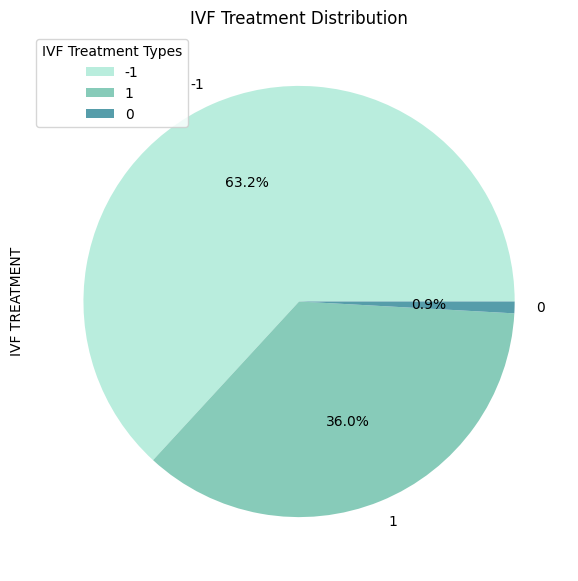

In [ ]:
print(data["IVF TREATMENT"].value_counts())
data["IVF TREATMENT"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(7,7), colors=['#B9EDDD', '#87CBB9', '#569DAA']);
plt.title('IVF Treatment Distribution')
plt.legend(data["IVF TREATMENT"].value_counts().index, title='IVF Treatment Types',loc='upper left')

This pie chart simply showcases the distribution of of ivf treatments, whether the implantation is unsuccessful, under progress or successful.

In [ ]:
y = data['IVF TREATMENT']
print(f'Percentage of IVF cases unsuccessful: % {round(y.value_counts(normalize=True)[-1]*100,2)} --> \
({y.value_counts()[-1]} cases for IVF not successful)\nPercentage of running: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} cases for running)\nPercentage of Success: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} cases for success)')

Percentage of IVF cases unsuccessful: % 63.16 --> (144 cases for IVF not successful)
Percentage of running: % 0.88 --> (2 cases for running)
Percentage of Success: % 35.96 --> (82 cases for success)


In [ ]:
data['IVF TREATMENT'].describe()

count    228.000000
mean      -0.271930
std        0.959856
min       -1.000000
25%       -1.000000
50%       -1.000000
75%        1.000000
max        1.000000
Name: IVF TREATMENT, dtype: float64

# Examination of Numerical Variables 



Now, let us plot the boxplots for the our numerical variables against the target variable (IVF TREATMENT).

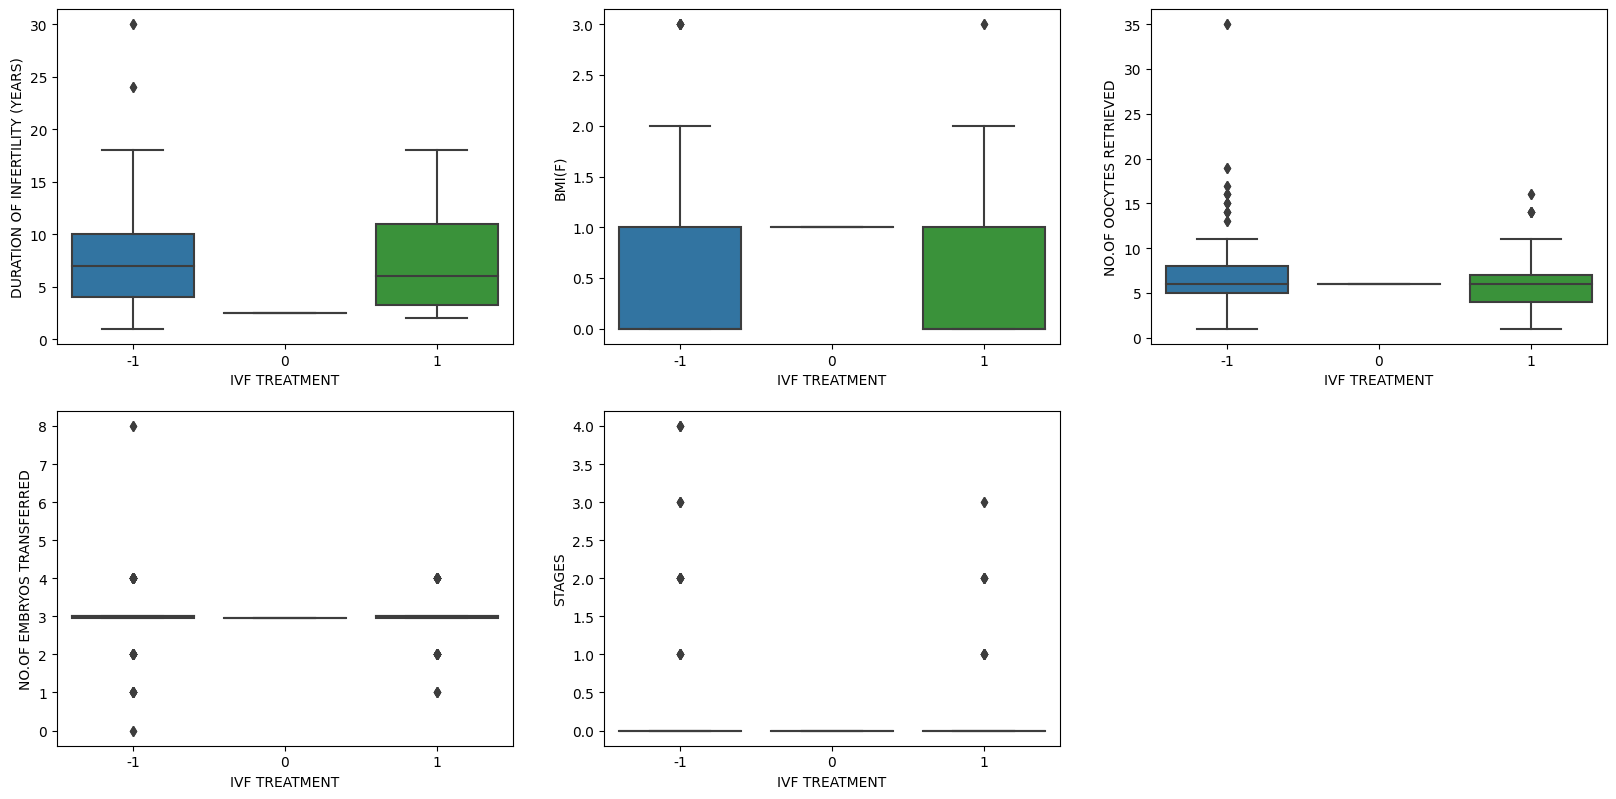

In [ ]:
index = 0
array =['DURATION OF INFERTILITY (YEARS)', 'BMI(F)', 'NO.OF OOCYTES RETRIEVED','NO.OF EMBRYOS TRANSFERRED','STAGES']
plt.figure(figsize=(20,20))
for feature in array:
    if feature != "IVF TREATMENT":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='IVF TREATMENT', y=feature, data=data)

- The box plot for "DURATION OF INFERTILITY (YEARS)" shows that the median duration for successful IVF treatment is lower compared to unsuccessful cases. This suggests that duration of infertility may be an important factor in predicting the success of IVF treatment.

- The box plot for "BMI(F)" shows that there is not much difference in the median BMI values between successful and unsuccessful IVF cases. However, there are some outliers in the unsuccessful cases indicating that extremely high or low BMI values may have a negative impact on the success of IVF treatment.

- The box plot for "NO.OF OOCYTES RETRIEVED" shows that successful IVF cases have a higher median value for this feature compared to unsuccessful cases. This suggests that the number of oocytes retrieved may be an important factor in predicting the success of IVF treatment.

- The box plot for "NO.OF EMBRYOS TRANSFERRED" indicates that this feature may not be a strong predictor of IVF success on its own, and other factors such as age, infertility duration, and BMI may also need to be considered.

-  The box plot for "STAGES" shows that there is no significant difference in the stage values among the three IVF treatment types. Further outliers are present for each case of implantation. thus we cannot really comment whether it is a strong indicator of ivf success.

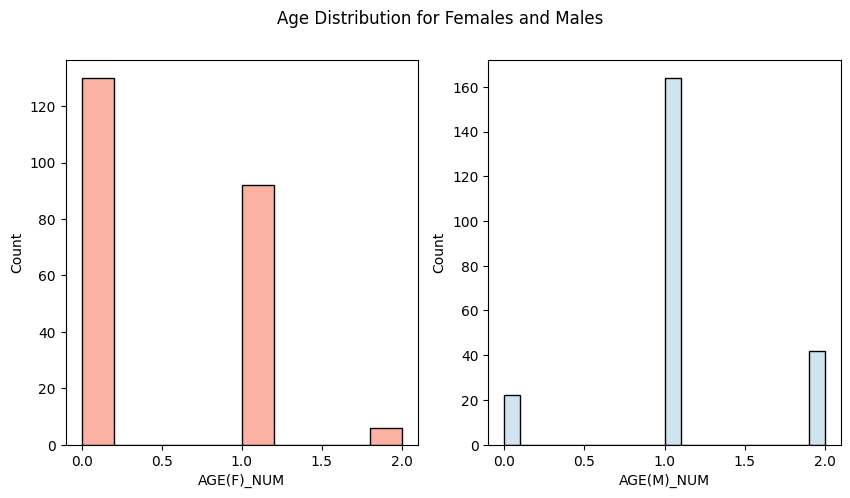

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create histogram for 'AGE(F)' in the first subplot
sns.histplot(data=data, x='AGE(F)_NUM', bins=10, ax=axes[0], color = '#FA9884')  # Pass the axes[0] for the first subplot

# Create histogram for 'AGE(M)' in the second subplot
sns.histplot(data=data, x='AGE(M)_NUM', bins=20, ax=axes[1], color = '#C0DBEA')  # Pass the axes[1] for the second subplot
# Add common x-axis and y-axis labels for the entire figure
fig.suptitle('Age Distribution for Females and Males')

plt.show()  # Show the entire figure with both histograms

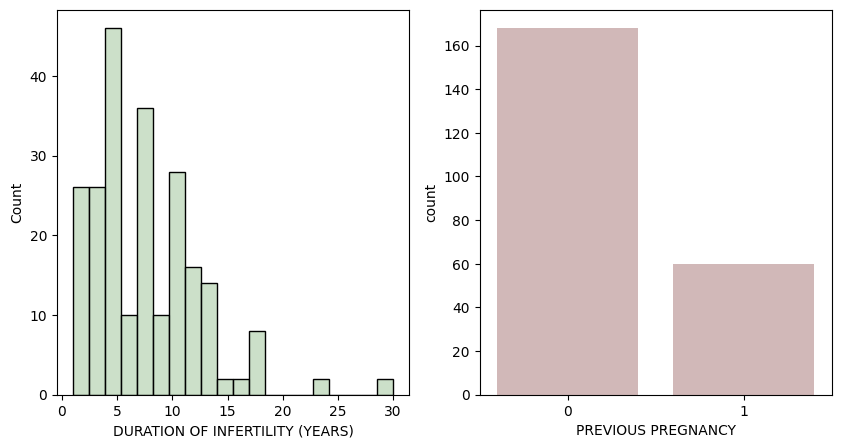

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create histogram for 'DURATION OF INFERTILITY (YEARS)' in the first subplot
sns.histplot(data=data, x='DURATION OF INFERTILITY (YEARS)', bins=20, ax=axes[0],color ='#BBD6B8' ) # Pass the axes[0] for the first subplot

# Create bargraph for 'PREVIOUS PREGNANCY' in the second subplot
sns.countplot(data=data, x='PREVIOUS PREGNANCY', ax =axes[1], color ='#D5B4B4') # Pass the axes[1] for the second subplot

plt.show()  # Show the entire figure with both histograms

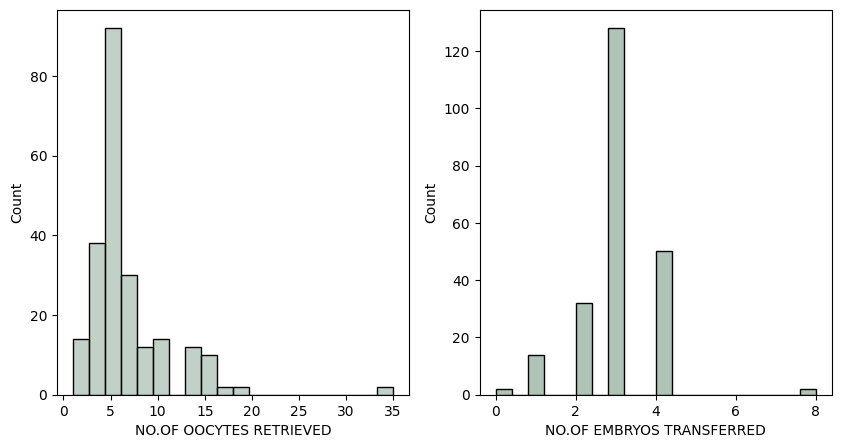

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create histogram for 'NO.OF OOCYTES RETRIEVED' in the first subplot
sns.histplot(data=data, x='NO.OF OOCYTES RETRIEVED', bins=20, ax= axes[0], color='#AEC2B6') # Pass the axes[0] for the first subplot

# Create bargraph for 'NO.OF EMBRYOS TRANSFERRED' in the second subplot
sns.histplot(data=data, x='NO.OF EMBRYOS TRANSFERRED',bins = 20,ax=axes[1], color= '#94AF9F' ) # Pass the axes[1] for the second subplot

plt.show()  # Show the entire figure with both histograms

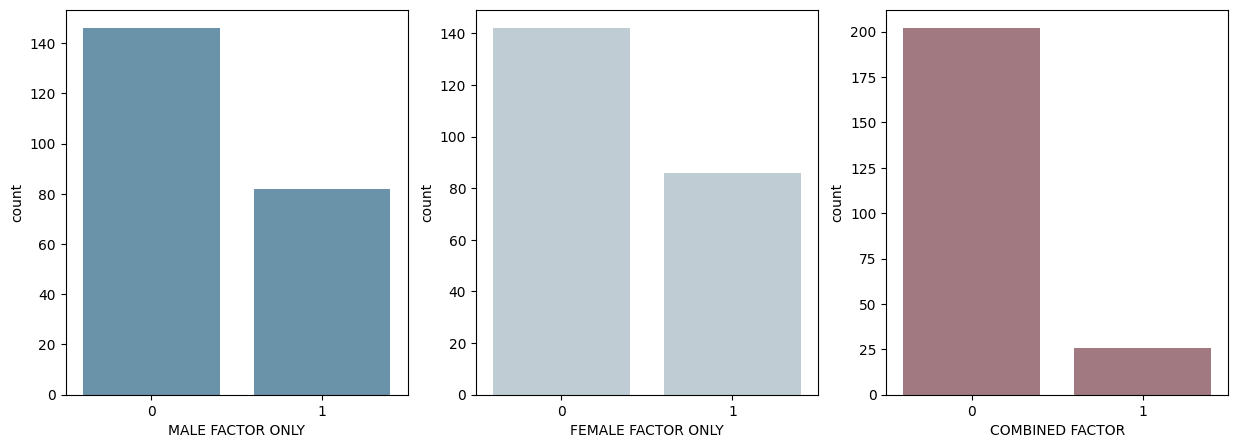

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

# Create histogram for 'MALE FACTOR ONLY' in the first subplot
sns.countplot(data=data, x='MALE FACTOR ONLY', ax=axes[0], color='#6096B4') 

# Create bargraph for 'FEMALE FACTOR ONLY' in the second subplot
sns.countplot(data=data, x='FEMALE FACTOR ONLY', ax=axes[1], color='#BDCDD6') 

# Create bargraph for 'COMBINED FACTOR' in the third subplot
sns.countplot(data=data, x='COMBINED FACTOR', ax=axes[2], color='#A7727D')

plt.show()  # Show the entire figure with both histograms

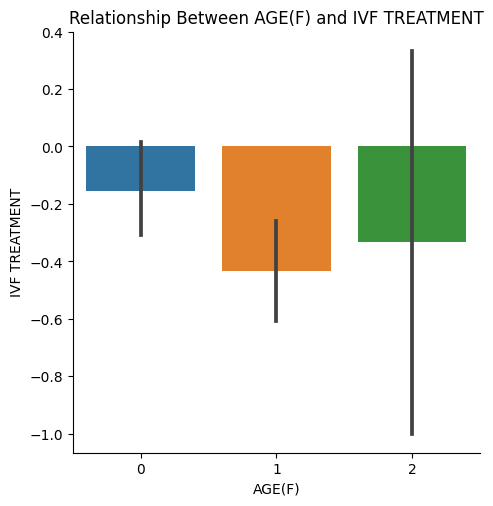

In [ ]:
sns.catplot(x="AGE(F)_NUM", y="IVF TREATMENT", kind="bar", data=data)
plt.title("Relationship Between AGE(F) and IVF TREATMENT")
plt.xlabel("AGE(F)")
plt.ylabel("IVF TREATMENT")
plt.show()

The above code generates a bar chart showing the relationship between age and IVF treatment. The x-axis shows the different age groups of females while the y-axis shows the count of IVF treatments. The majority of patients who received IVF treatment are in the age group of 30-40, followed by the age group above 40, and the age group between 20-30.

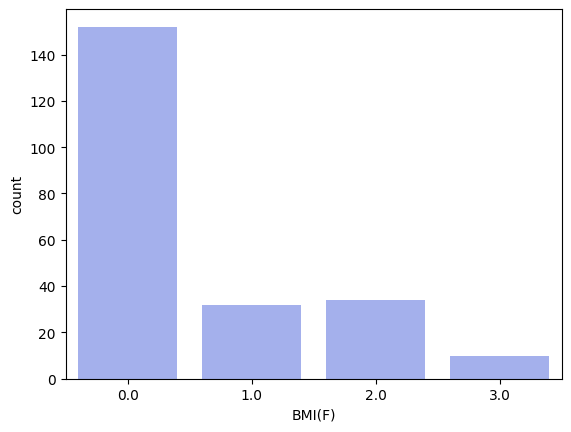

In [ ]:
# Visualize the body mass index for females
sns.countplot(data=data, x='BMI(F)', color='#98A8F8')

plt.show()


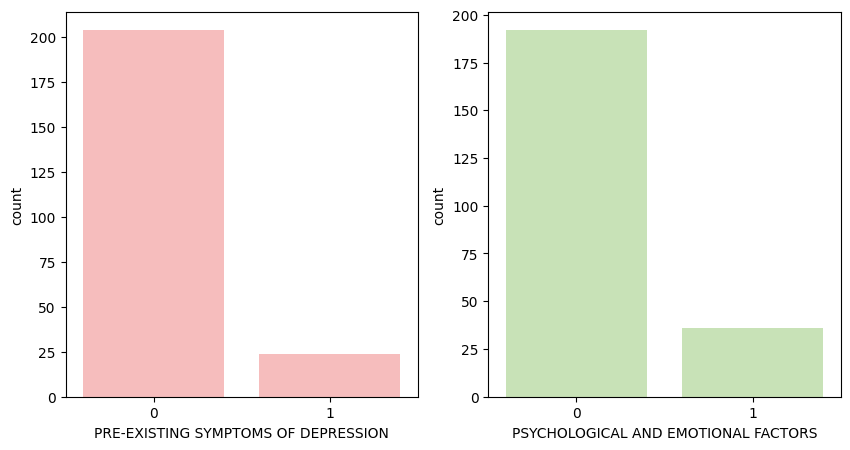

In [ ]:
# Visualize the occurrence of pre-existing symptoms of depression and psychological/emotional factors
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Create bar graph for 'PRE-EXISTING SYMPTOMS OF DEPRESSION' in the first subplot
sns.countplot(data=data, x='PRE-EXISTING SYMPTOMS OF DEPRESSION', ax= axes[0], color='#FFB4B4')

# Create bar graph for 'PSYCHOLOGICAL AND EMOTIONAL FACTORS' in the second subplot
sns.countplot(data=data, x='PSYCHOLOGICAL AND EMOTIONAL FACTORS', ax = axes[1], color= '#C7E9B0')
plt.show()

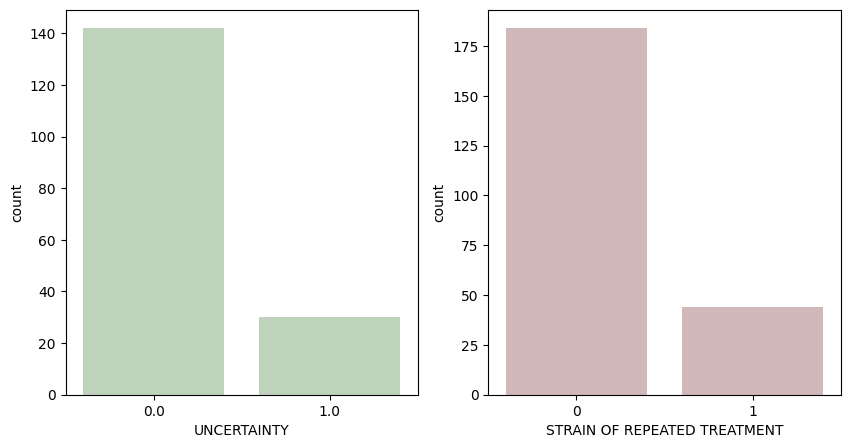

In [ ]:
# Visualize the uncertainty and strain of repeated treatment
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Create bar graph for 'UNCERTAINTY' in the first subplot
sns.countplot(data=data, x='UNCERTAINTY',ax = axes[0], color ='#BBD6B8')

# Create bar graph for 'STRAIN OF REPEATED TREATMENT' in the second subplot
sns.countplot(data=data, x='STRAIN OF REPEATED TREATMENT', ax = axes[1], color= '#D5B4B4')
plt.show()


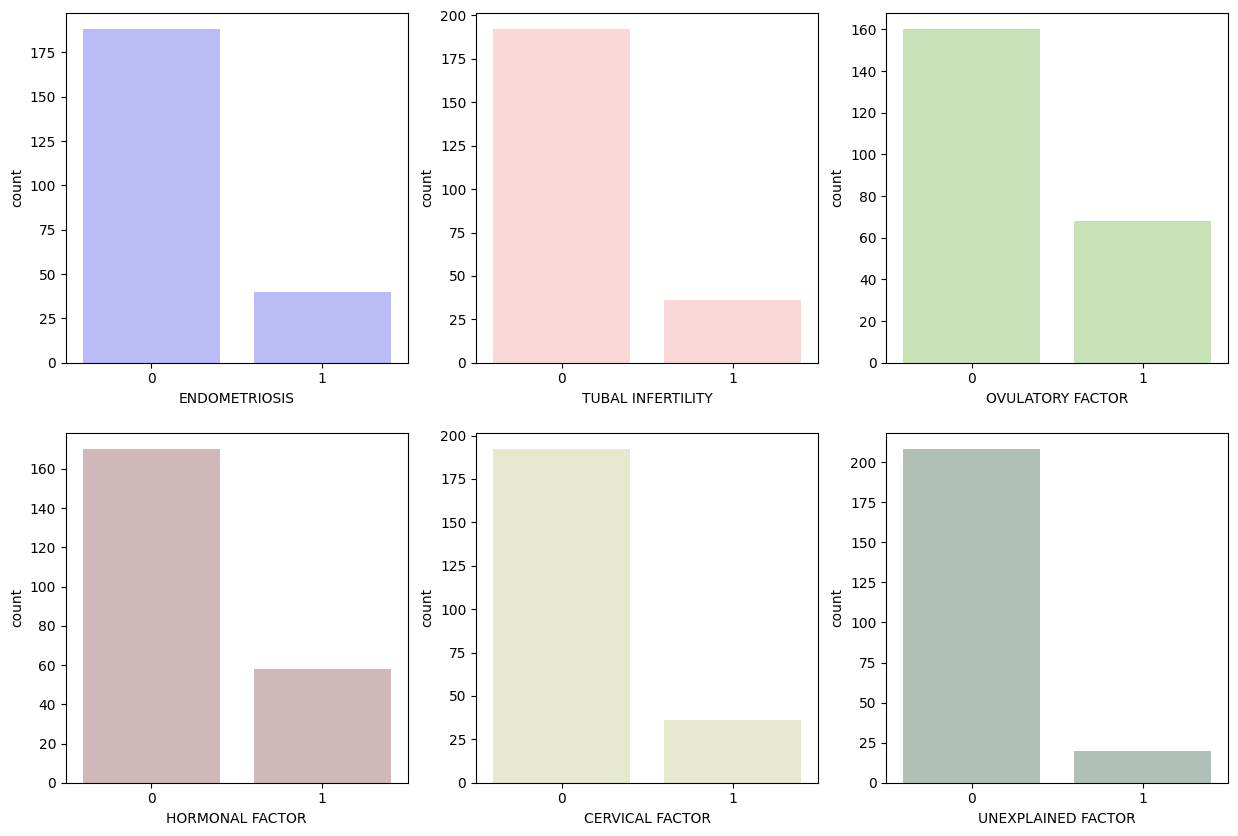

In [ ]:
# Visualize the occurrence of endometriosis, tubal infertility, ovulatory factor, hormonal factor, cervical factor, and unexplained factor
fig, axes = plt.subplots(2, 3, figsize=(15,10))

sns.countplot(data=data, x='ENDOMETRIOSIS', ax=axes[0,0],color ='#B1B2FF')
sns.countplot(data=data, x='TUBAL INFERTILITY', ax=axes[0,1],color ='#FFD1D1')
sns.countplot(data=data, x='OVULATORY FACTOR', ax=axes[0,2],color ='#C7E9B0')
sns.countplot(data=data, x='HORMONAL FACTOR', ax=axes[1,0],color ='#D5B4B4')
sns.countplot(data=data, x='CERVICAL FACTOR', ax=axes[1,1],color ='#E9EDC9')
sns.countplot(data=data, x='UNEXPLAINED FACTOR', ax=axes[1,2],color ='#AEC2B6')
plt.show()

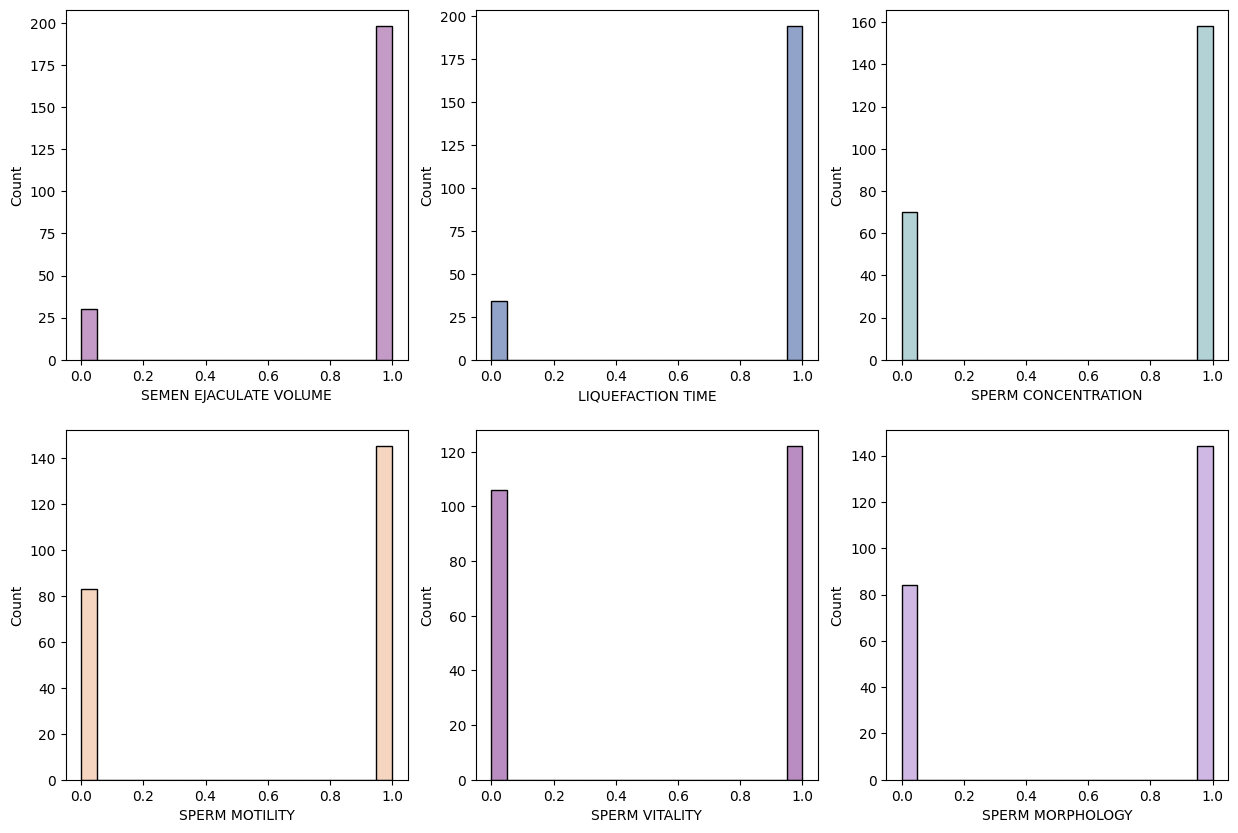

In [ ]:
# Visualize the semen analysis parameters
fig, axes = plt.subplots(2, 3, figsize=(15,10))
sns.histplot(data=data, x='SEMEN EJACULATE VOLUME', bins=20, ax = axes[0,0], color ='#AF7AB3')
sns.histplot(data=data, x='LIQUEFACTION TIME', bins=20, ax = axes[0,1], color ='#6E85B7')
sns.histplot(data=data, x='SPERM CONCENTRATION', bins=20, ax = axes[0,2], color ='#99C4C8')
sns.histplot(data=data, x='SPERM MOTILITY', bins=20, ax = axes[1,0], color ='#F4C7AB')
sns.histplot(data=data, x='SPERM VITALITY', bins=20, ax = axes[1,1], color ='#A267AC')
sns.histplot(data=data, x='SPERM MORPHOLOGY', bins=20, ax = axes[1,2], color ='#BFA2DB')
plt.show()


0    188
2     16
1     14
3      6
4      4
Name: STAGES, dtype: int64


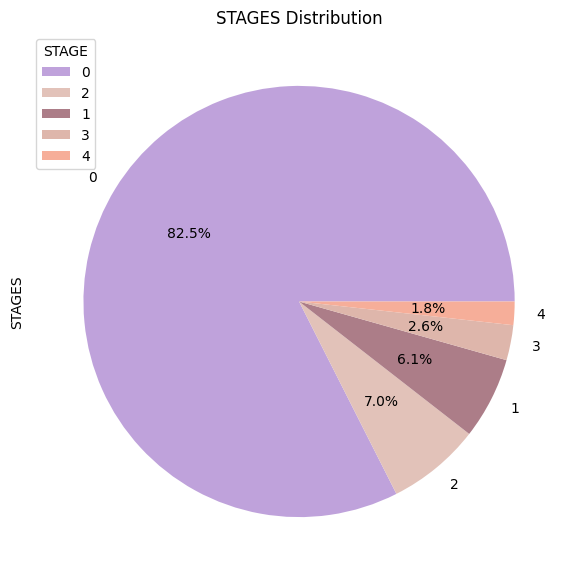

In [ ]:
#pie chart for STAGES column 
print(data["STAGES"].value_counts())
data["STAGES"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(7,7), colors=['#BFA2DB', '#E2C2B9', '#AC7D88','#DEB6AB','#F6AE99']);
plt.title('STAGES Distribution')
plt.legend(data["STAGES"].value_counts().index, title='STAGE',loc='upper left')

0    170
1     58
Name: HORMONAL FACTOR, dtype: int64


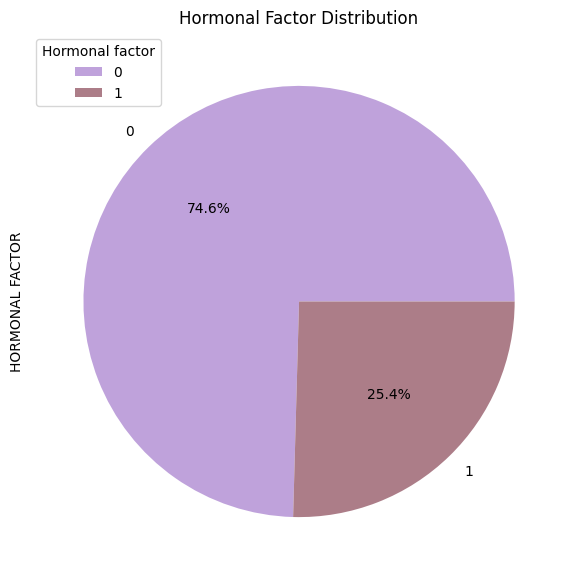

In [ ]:
#pie chart for HORMONAL FACTOR column 
print(data["HORMONAL FACTOR"].value_counts())
data["HORMONAL FACTOR"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(7,7), colors=['#BFA2DB','#AC7D88']);
plt.title('Hormonal Factor Distribution')
plt.legend(data["HORMONAL FACTOR"].value_counts().index, title='Hormonal factor',loc='upper left')

0    208
2     10
3      8
1      2
Name: GROSS AND MICROSCOPIC APPEARANCE, dtype: int64


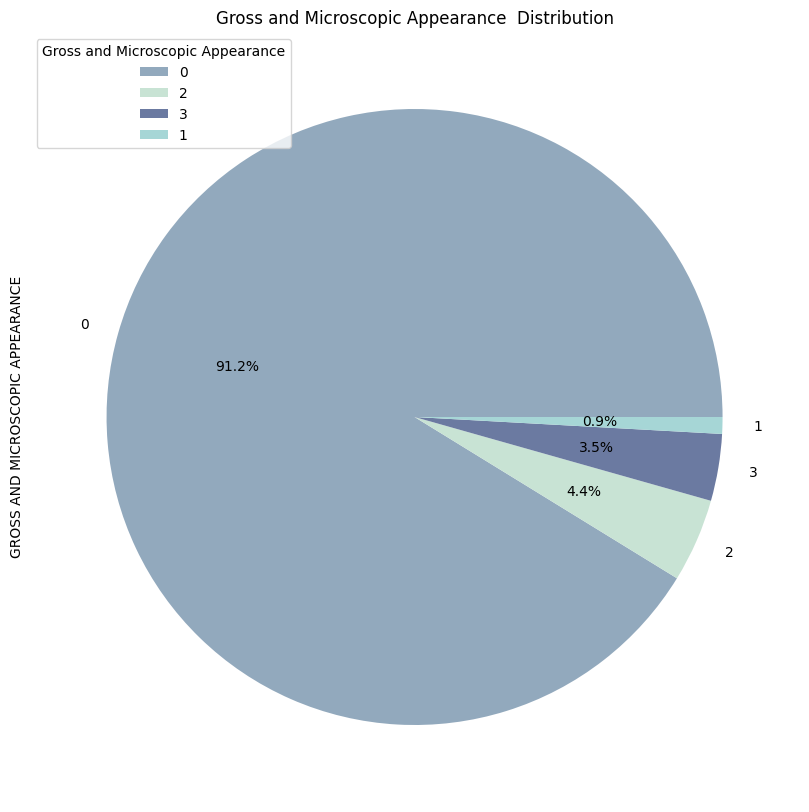

In [ ]:
#pie chart for GROSS AND MICROSCOPIC APPEARANCE column 
print(data["GROSS AND MICROSCOPIC APPEARANCE"].value_counts())
data["GROSS AND MICROSCOPIC APPEARANCE"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10), colors=['#92A9BD','#C8E3D4','#6B7AA1','#A6D6D6']);
plt.title('Gross and Microscopic Appearance  Distribution')
plt.legend(data["GROSS AND MICROSCOPIC APPEARANCE"].value_counts().index, title='Gross and Microscopic Appearance',loc='upper left')

0    190
1     38
Name: UNKNOWN FACTOR, dtype: int64


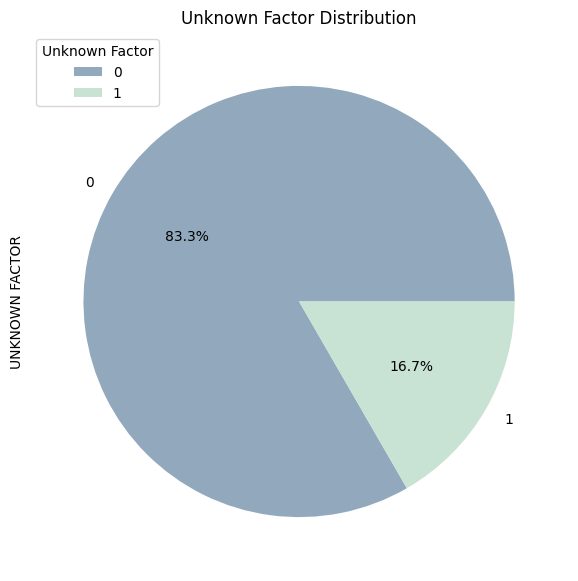

In [ ]:
#pie chart for Unkown Factor column 
print(data['UNKNOWN FACTOR'].value_counts())
data['UNKNOWN FACTOR'].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(7,7), colors=['#92A9BD','#C8E3D4']);
plt.title('Unknown Factor Distribution')
plt.legend(data['UNKNOWN FACTOR'].value_counts().index, title='Unknown Factor',loc='upper left')

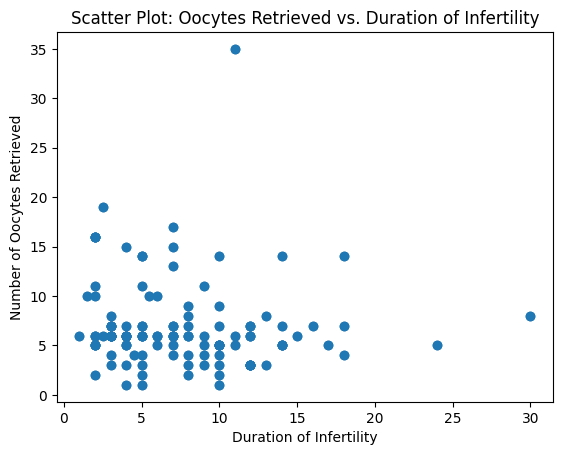

In [ ]:
# Extract the columns for number of oocytes retrieved and number of embryos transferred
oocytes_retrieved = data['NO.OF OOCYTES RETRIEVED']
duration_of_infertility = data['DURATION OF INFERTILITY (YEARS)']

# Create a scatter plot
plt.scatter(duration_of_infertility,oocytes_retrieved)

# Set labels and title
plt.ylabel('Number of Oocytes Retrieved')
plt.xlabel('Duration of Infertility')
plt.title('Scatter Plot: Oocytes Retrieved vs. Duration of Infertility')

# Display the plot
plt.show()

The scatter plot shows a negative relationship between the duration of infertility and the number of oocytes retrieved. As the duration of infertility increases, the number of oocytes retrieved decreases. This negative relationship indicates that as the couple spends more time trying to conceive, the woman's ovarian reserve and egg quality may decline, resulting in fewer oocytes being retrieved during the IVF cycle. The scatter plot also shows a few outliers, indicating that some couples with longer duration of infertility had a higher number of oocytes retrieved than expected, possibly due to other factors such as younger age or better ovarian reserve.

But it is important to note that  may be other variables that are influencing the relationship between the two variables being plotted.

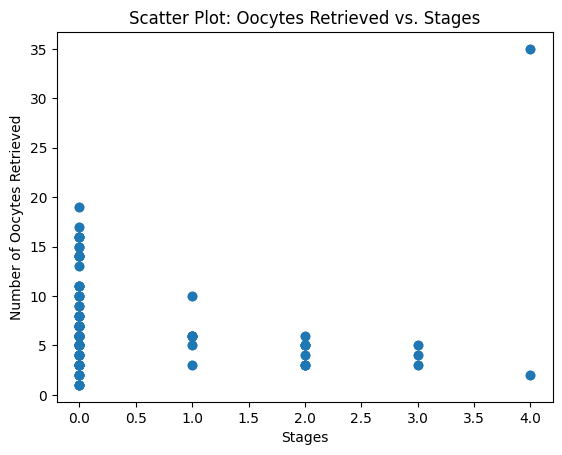

In [ ]:
# Extract the columns for number of oocytes retrieved and number of embryos transferred
oocytes_retrieved = data['NO.OF OOCYTES RETRIEVED']
stages = data['STAGES']

# Create a scatter plot
plt.scatter(stages,oocytes_retrieved)

# Set labels and title
plt.ylabel('Number of Oocytes Retrieved')
plt.xlabel('Stages')
plt.title('Scatter Plot: Oocytes Retrieved vs. Stages')

# Display the plot
plt.show()

This is a scatter plot that shows the relationship between the number of oocytes retrieved and the stages of fertility treatment. The x-axis represents the stages of fertility treatment, while the y-axis represents the number of oocytes retrieved. The plot shows that there is a positive relationship between the two variables, as the number of oocytes retrieved tends to increase as the stages of fertility treatment progress. The plot also shows that there is a lot of variability in the number of oocytes retrieved across the different stages of fertility treatment, with some stages having a wider range of values than others. Overall, this plot suggests that the number of oocytes retrieved is strongly related to the stages of fertility treatment, and that fertility treatments in later stages tend to yield more oocytes.





<ipython-input-88-634d48e2c094>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




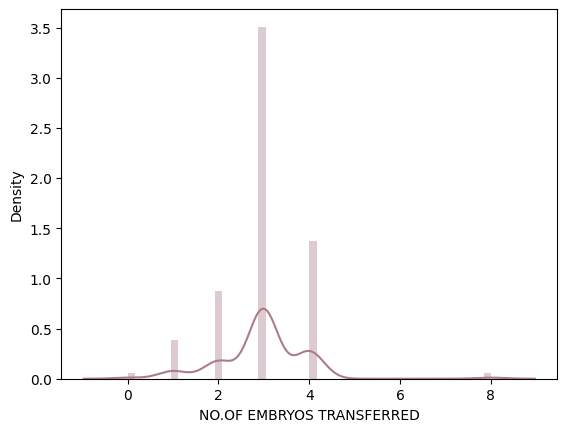

In [ ]:
sns.distplot(data['NO.OF EMBRYOS TRANSFERRED'], color ='#AC7D88')
plt.show()

# **Feature Engineering**

The first steps of feature engineering would involve handling the categorical variables and converting them to numerical variables which we have already done above in the handling categorical variables section 


In [ ]:
data['IF YES, PREVIOUS MISCARRIAGE'] = data['IF YES, PREVIOUS MISCARRIAGE'].fillna(0)
data['UNCERTAINTY'] = data['UNCERTAINTY'].fillna(0)

# ***Dimensionality Reduction***
There are various methods of dimensionality reduction which include 
1. Feature selection techniques like univariate feature selection, feature selection on tree based algorithms, correlation and mutual information etc. 
2. Feature extraction techniques which involve creating new features that are linear or non linear combinations of the original features using linear transformation techniques like Principle Component Analysis, or non linear mappings like t-SNE. 


Now we can get to the feature selection aspect of feature engineering.
The first method of feature selection is: 


**1. UNIVARIATE FEATURE SELECTION**

    - Chi-squared score 

In [ ]:
#UNIVARIATE FEATURE SELECTION 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Select the feature columns and the target variable
X = data.drop(['IVF TREATMENT'], axis=1) # Exclude the target variable
y = data['IVF TREATMENT'] # Target variable

# Perform chi-squared test for feature selection
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)

# Get the chi-squared scores and p-values for each feature
chi2_scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame to store the chi-squared scores and p-values
chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_scores, 'p-value': p_values})

# Sort the results by chi-squared score in descending order
chi2_results = chi2_results.sort_values(by='Chi2 Score', ascending=False)

# Print the top 10 features with highest chi-squared scores
top_20_features = chi2_results.head(20)
print("Top 20 features with highest chi-squared scores:")
print(top_20_features)


Top 20 features with highest chi-squared scores:
                                Feature  Chi2 Score       p-value
20     GROSS AND MICROSCOPIC APPEARANCE   32.484977  8.830329e-08
31                       UNKNOWN FACTOR   28.000000  8.315287e-07
27                     MALE FACTOR ONLY   21.488400  2.157016e-05
8   PSYCHOLOGICAL AND EMOTIONAL FACTORS   16.181346  3.063835e-04
10         STRAIN OF REPEATED TREATMENT   11.342942  3.442798e-03
28                   SEVERE MALE FACTOR   10.237066  5.984797e-03
30                      COMBINED FACTOR    9.504690  8.631429e-03
0       DURATION OF INFERTILITY (YEARS)    6.909542  3.159454e-02
25              NO.OF OOCYTES RETRIEVED    6.554504  3.773180e-02
17                   UNEXPLAINED FACTOR    6.206098  4.491207e-02
23                       SPERM VITALITY    6.004998  4.966281e-02
7   PRE-EXISTING SYMPTOMS OF DEPRESSION    5.304539  7.049104e-02
9                           UNCERTAINTY    4.071274  1.305973e-01
24                     SPER

**2. Correlation and Mutual Information method of Feature Selection**

In [ ]:
##Correlation and Mutual Information 
from sklearn.feature_selection import mutual_info_classif
# Drop any unnecessary columns
X = data.drop(['IVF TREATMENT'], axis=1) # Exclude the target variable
y = data['IVF TREATMENT'] # Target variable

# Calculate Pearson correlation between features and target variable
correlation_scores = X.corrwith(y)

# Create a DataFrame to store the correlation scores
correlation_results = pd.DataFrame({'Feature': correlation_scores.index, 'Correlation Score': correlation_scores.values})

# Sort the results by correlation score in descending order
correlation_results = correlation_results.sort_values(by='Correlation Score', ascending=False)

# Print the top 10 features with highest correlation scores
top_20_correlation_features = correlation_results.head(20)
print("Top 20 features with highest correlation scores:")
print(top_20_correlation_features)

# Calculate mutual information between features and target variable
mutual_info_scores = mutual_info_classif(X, y)

# Create a DataFrame to store the mutual information scores
mutual_info_results = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info_scores})

# Sort the results by mutual information score in descending order
mutual_info_results = mutual_info_results.sort_values(by='Mutual Information', ascending=False)

# Print the top 10 features with highest mutual information scores
top_20_mutual_info_features = mutual_info_results.head(20)
print("\n Top 20 features with highest mutual information scores:")
print(top_20_mutual_info_features)

Top 20 features with highest correlation scores:
                                Feature  Correlation Score
23                       SPERM VITALITY           0.212786
21                  SPERM CONCENTRATION           0.208144
24                     SPERM MORPHOLOGY           0.200863
8   PSYCHOLOGICAL AND EMOTIONAL FACTORS           0.198296
10         STRAIN OF REPEATED TREATMENT           0.162051
18               SEMEN EJACULATE VOLUME           0.160429
7   PRE-EXISTING SYMPTOMS OF DEPRESSION           0.157074
19                    LIQUEFACTION TIME           0.138259
9                           UNCERTAINTY           0.137613
22                       SPERM MOTILITY           0.118302
14                     OVULATORY FACTOR           0.024937
4                     MEDICAL DISORDERS           0.015418
11                        ENDOMETRIOSIS           0.010562
0       DURATION OF INFERTILITY (YEARS)          -0.000691
20     GROSS AND MICROSCOPIC APPEARANCE          -0.010077
15     

**3. Recursive Feature Elimination Method for feature selection** 

> RFE is an iterative technique that involves training a model (e.g., logistic regression, decision tree, etc.) and removing the least important feature(s) at each iteration until a specified number of features are selected. This technique ranks the features based on their importance and selects the top-ranked features as the most relevant.



*Logistic Regression*

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Drop any unnecessary columns
X = data.drop(['IVF TREATMENT'], axis=1) # Exclude the target variable
y = data['IVF TREATMENT'] # Target variable

model = LogisticRegression()

# Perform RFE for feature selection
rfe = RFE(model, n_features_to_select=10)  # Select the top 10 features
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected features:")
print(selected_features)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/lin

Selected features:
Index(['PSYCHOLOGICAL AND EMOTIONAL FACTORS', 'TUBAL INFERTILITY',
       'HORMONAL FACTOR', 'UNEXPLAINED FACTOR',
       'GROSS AND MICROSCOPIC APPEARANCE', 'SPERM MORPHOLOGY',
       'MALE FACTOR ONLY', 'FEMALE FACTOR ONLY', 'UNKNOWN FACTOR',
       'AGE(F)_NUM'],
      dtype='object')


*Decision Tree Classifier*

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Drop any unnecessary columns
X = data.drop(['IVF TREATMENT'], axis=1) # Exclude the target variable
y = data['IVF TREATMENT'] # Target variable

# Create a decision tree classifier
model = DecisionTreeClassifier()

# Fit the model
model.fit(X, y)

# Get the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store the feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Feature Importance': feature_importances})

# Sort the feature importances in descending order
feature_importances_df = feature_importances_df.sort_values(by='Feature Importance', ascending=False)

# Print the feature importances
print("Feature importances:")
print(feature_importances_df)

Feature importances:
                                Feature  Feature Importance
31                       UNKNOWN FACTOR            0.232756
29                   FEMALE FACTOR ONLY            0.183903
27                     MALE FACTOR ONLY            0.150928
10         STRAIN OF REPEATED TREATMENT            0.089954
26            NO.OF EMBRYOS TRANSFERRED            0.062677
6                                BMI(F)            0.060275
7   PRE-EXISTING SYMPTOMS OF DEPRESSION            0.040365
20     GROSS AND MICROSCOPIC APPEARANCE            0.038068
0       DURATION OF INFERTILITY (YEARS)            0.029574
32                           AGE(F)_NUM            0.028699
22                       SPERM MOTILITY            0.023440
18               SEMEN EJACULATE VOLUME            0.020092
25              NO.OF OOCYTES RETRIEVED            0.016717
14                     OVULATORY FACTOR            0.005860
12                               STAGES            0.005023
23                 

**4. Feature Importance from Tree-based Model for feature selection**
> Tree-based models such as decision trees, random forests, and gradient boosting machines can provide feature importance scores based on how frequently a feature is used for splitting the tree and how much it reduces the impurity. You can use these feature importance scores to rank the features and select the top-ranked features as the most relevant.

*Random Forest and Gradient Boosting* 

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Drop any unnecessary columns
X = data.drop(['IVF TREATMENT'], axis=1) # Exclude the target variable
y = data['IVF TREATMENT'] # Target variable


# Create a Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# Create a Gradient Boosting classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X, y)

# Extract feature importances from the models
rf_feature_importances = rf_model.feature_importances_
gb_feature_importances = gb_model.feature_importances_

# Create DataFrames to store the feature importances
rf_feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Random Forest Feature Importance': rf_feature_importances})
gb_feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Gradient Boosting Feature Importance': gb_feature_importances})

# Sort the feature importances in descending order
rf_feature_importances_df = rf_feature_importances_df.sort_values(by='Random Forest Feature Importance', ascending=False)
gb_feature_importances_df = gb_feature_importances_df.sort_values(by='Gradient Boosting Feature Importance', ascending=False)

# Print the feature importances

print("Random Forest Feature Importances:")
print(rf_feature_importances_df)

print("\n Gradient Boosting Feature Importances:")
print(gb_feature_importances_df)



Random Forest Feature Importances:
                                Feature  Random Forest Feature Importance
27                     MALE FACTOR ONLY                          0.115677
0       DURATION OF INFERTILITY (YEARS)                          0.101466
31                       UNKNOWN FACTOR                          0.101055
25              NO.OF OOCYTES RETRIEVED                          0.064699
29                   FEMALE FACTOR ONLY                          0.059516
22                       SPERM MOTILITY                          0.047997
26            NO.OF EMBRYOS TRANSFERRED                          0.044532
6                                BMI(F)                          0.040004
23                       SPERM VITALITY                          0.028191
33                           AGE(M)_NUM                          0.026208
32                           AGE(F)_NUM                          0.023893
8   PSYCHOLOGICAL AND EMOTIONAL FACTORS                          0.023207
14 

We have evaluated 7 feature selection methods namely: Chi-squared test, Correlation, Mutual Information, Logistic Regression, Decision Tree, Random Forest and Gradient Boosting. 
After analyzing the top 20 important features from each feature selection technique we have selected the features
which appear in 5 or 6 out of 7 of the methods.
These are the Top 10 features : 
1. Age(F)
2. Duration of infertility(years) 
3. BMI(F)
4. Psychological and Emotional 
5. Strain of repeated treatment 
6. Gross and Microscopic Appearance 
7. Sperm Motility 
8. Sperm Vitality 
9. No. Of Oocytes Retrieved 
10. No. Of Embryos Transferred

Moving onto the next part of dimensionality reduction i.e **Feature Extraction**

***Principle Component Analysis*** 

Using a scree plot to evaluate how many principle components are required.

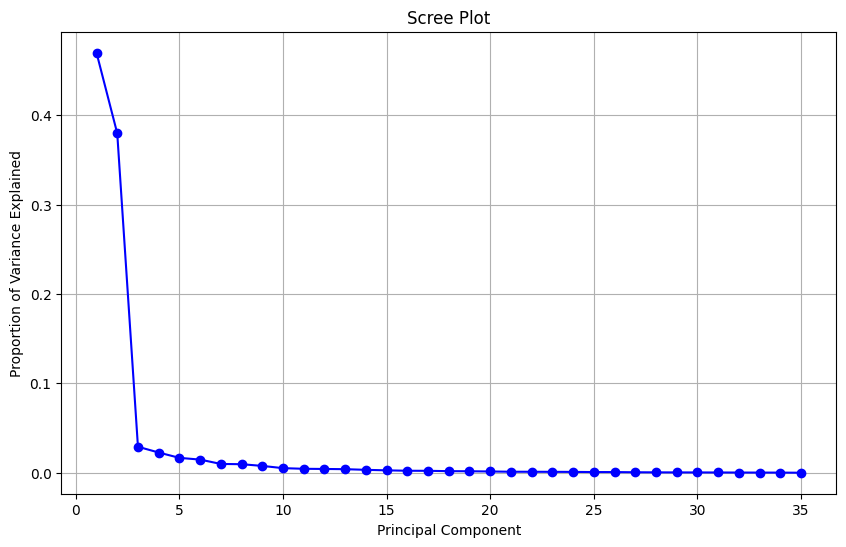

In [ ]:
from sklearn.decomposition import PCA

# Extract the features (columns) from your dataset
features =['DURATION OF INFERTILITY (YEARS)', 'PREVIOUS PREGNANCY', 'IF YES, PREVIOUS MISCARRIAGE', 'IF YES MISCARRIAGE CAUSED', 'MEDICAL DISORDERS', 'PREVIOUS SURGERY', 'BMI(F)', 'PRE-EXISTING SYMPTOMS OF DEPRESSION', 'PSYCHOLOGICAL AND EMOTIONAL FACTORS', 'UNCERTAINTY', 'STRAIN OF REPEATED TREATMENT', 'ENDOMETRIOSIS', 'STAGES', 'TUBAL INFERTILITY', 'OVULATORY FACTOR', 'HORMONAL FACTOR', 'CERVICAL FACTOR', 'UNEXPLAINED FACTOR', 'SEMEN EJACULATE VOLUME', 'LIQUEFACTION TIME', 'GROSS AND MICROSCOPIC APPEARANCE', 'SPERM CONCENTRATION', 'SPERM MOTILITY', 'SPERM VITALITY', 'SPERM MORPHOLOGY', 'IVF TREATMENT', 'NO.OF OOCYTES RETRIEVED', 'NO.OF EMBRYOS TRANSFERRED', 'MALE FACTOR ONLY', 'SEVERE MALE FACTOR', 'FEMALE FACTOR ONLY', 'COMBINED FACTOR', 'UNKNOWN FACTOR', 'AGE(F)_NUM', 'AGE(M)_NUM']

# Perform PCA
pca = PCA()
pca.fit(data[features])

# Extract the eigenvalues (variances) of the principal components
eigenvalues = pca.explained_variance_

# Compute the proportion of variance explained by each principal component
variance_ratio = pca.explained_variance_ratio_

# Generate the scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), variance_ratio, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

From the above scree plot we interpret that 4 principle components are enough to describe our data. Therefore, we perform the Principle Component Analysis for 4 principle components 

In [ ]:
# Extract column names in the order they appear in the DataFrame
column_names = data.columns.tolist()

# Print column names
print(column_names)

['DURATION OF INFERTILITY (YEARS)', 'PREVIOUS PREGNANCY', 'IF YES, PREVIOUS MISCARRIAGE', 'IF YES MISCARRIAGE CAUSED', 'MEDICAL DISORDERS', 'PREVIOUS SURGERY', 'BMI(F)', 'PRE-EXISTING SYMPTOMS OF DEPRESSION', 'PSYCHOLOGICAL AND EMOTIONAL FACTORS', 'UNCERTAINTY', 'STRAIN OF REPEATED TREATMENT', 'ENDOMETRIOSIS', 'STAGES', 'TUBAL INFERTILITY', 'OVULATORY FACTOR', 'HORMONAL FACTOR', 'CERVICAL FACTOR', 'UNEXPLAINED FACTOR', 'SEMEN EJACULATE VOLUME', 'LIQUEFACTION TIME', 'GROSS AND MICROSCOPIC APPEARANCE', 'SPERM CONCENTRATION', 'SPERM MOTILITY', 'SPERM VITALITY', 'SPERM MORPHOLOGY', 'IVF TREATMENT', 'NO.OF OOCYTES RETRIEVED', 'NO.OF EMBRYOS TRANSFERRED', 'MALE FACTOR ONLY', 'SEVERE MALE FACTOR', 'FEMALE FACTOR ONLY', 'COMBINED FACTOR', 'UNKNOWN FACTOR', 'AGE(F)_NUM', 'AGE(M)_NUM']


Principal Components:
PC1: Explained Variance Ratio = 0.18
[ 0.08082898  0.22935524  0.22935524  0.22983009 -0.12166432 -0.17768703
  0.25737723  0.26603621  0.28353623  0.29161797  0.28319102  0.19150882
  0.19346165  0.17589034  0.06314909 -0.18481262 -0.03194956 -0.04329575
 -0.17828095 -0.21250809  0.24024208 -0.1191161  -0.08272973 -0.07499979
 -0.10790715 -0.09127203 -0.08735557  0.14854119  0.09866607  0.08737821
  0.07961578 -0.08132001  0.13308657  0.0362248 ]

PC2: Explained Variance Ratio = 0.15
[-0.02818351 -0.1633977  -0.1633977  -0.16058161  0.00060601  0.0774807
 -0.02558451 -0.08249368 -0.11535173 -0.09764587 -0.09073768 -0.07686387
 -0.10982633 -0.1501555  -0.16883834  0.07909885 -0.10397431 -0.05839779
 -0.29784217 -0.2781902   0.13780967 -0.33666155 -0.21557048 -0.29959226
 -0.32219024  0.02977149 -0.02968779  0.28908063  0.32538408 -0.22770056
  0.04019072 -0.04896297  0.01453353  0.01539865]

PC3: Explained Variance Ratio = 0.09
[ 3.21470094e-01  1.18385353e-01  1.

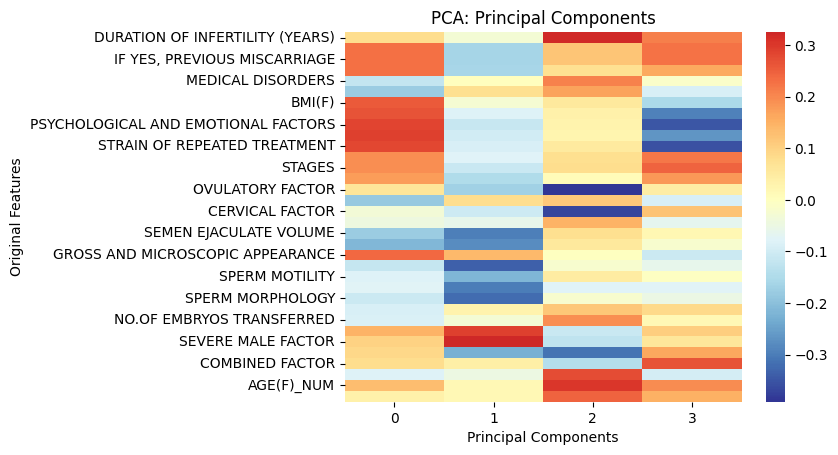

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Extract the features (X) and target variable (y)
X = data.drop('IVF TREATMENT', axis=1) # Exclude the target variable
y = data['IVF TREATMENT'] # Target variable

# Perform feature scaling (optional but recommended for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with n_components set to the number of desired components
n_components = 4 
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# 'X_pca' now contains the reduced-dimensional data after PCA

# Access the principal components and their explained variance ratio
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

# Display the principal components
print('Principal Components:')
for i in range(n_components):
    print('PC{}: Explained Variance Ratio = {:.2f}'.format(i+1, explained_variance_ratio[i]))
    print(principal_components[i])
    print()

# Create a heatmap for the principal components
sns.heatmap(pd.DataFrame(principal_components, columns=X.columns).transpose(),
            cmap='RdYlBu_r', center=0)
plt.title('PCA: Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()


Inferences Drawn from Principle Component Analysis 
- Firstly the various components like PC1, PC2 , PC3 and so on are sorted in order of their explained variance ratio,  which indicates the proportion of the total variance in the data explained by each PC.
For example in our PCA we see that PC1 has the variance of 0.18 which means it represents the 18% of the variance in our data. 
- The coefficients of the original variables in PC1 represent the contributions of each variable to the first principal component (PC1). These coefficients, also known as loadings or eigenvectors, indicate the direction and magnitude of the relationship between the original variables and PC1.


Inferences Drawn from the Heatmap 
- The columns Previous Pregnancies,If yes, previous miscarriage, BMI(f), Psychological and Emotional Factors, Strain of repeated treatment, Gross and Microscopic Appearance contribute positively to PC1 
- The columns Sperm Concentration, Sperm Morphology, Sperm Vitality, Male Factor only, Severe Male Factor contribute the most to PC2
- Duration of infertility, Age(F), Female Factor, Ovulatory Factor,Cervical Factor contribute the most to PC3
-Combined Factor, Stages, Strain of repeated treatment contributue most to PC4


#**MODEL SELECTION**

**1.Random Forest Prediction Model**

Accuracy: 0.8695652173913043
Specificity: 0.93
Sensitivity: 0.75


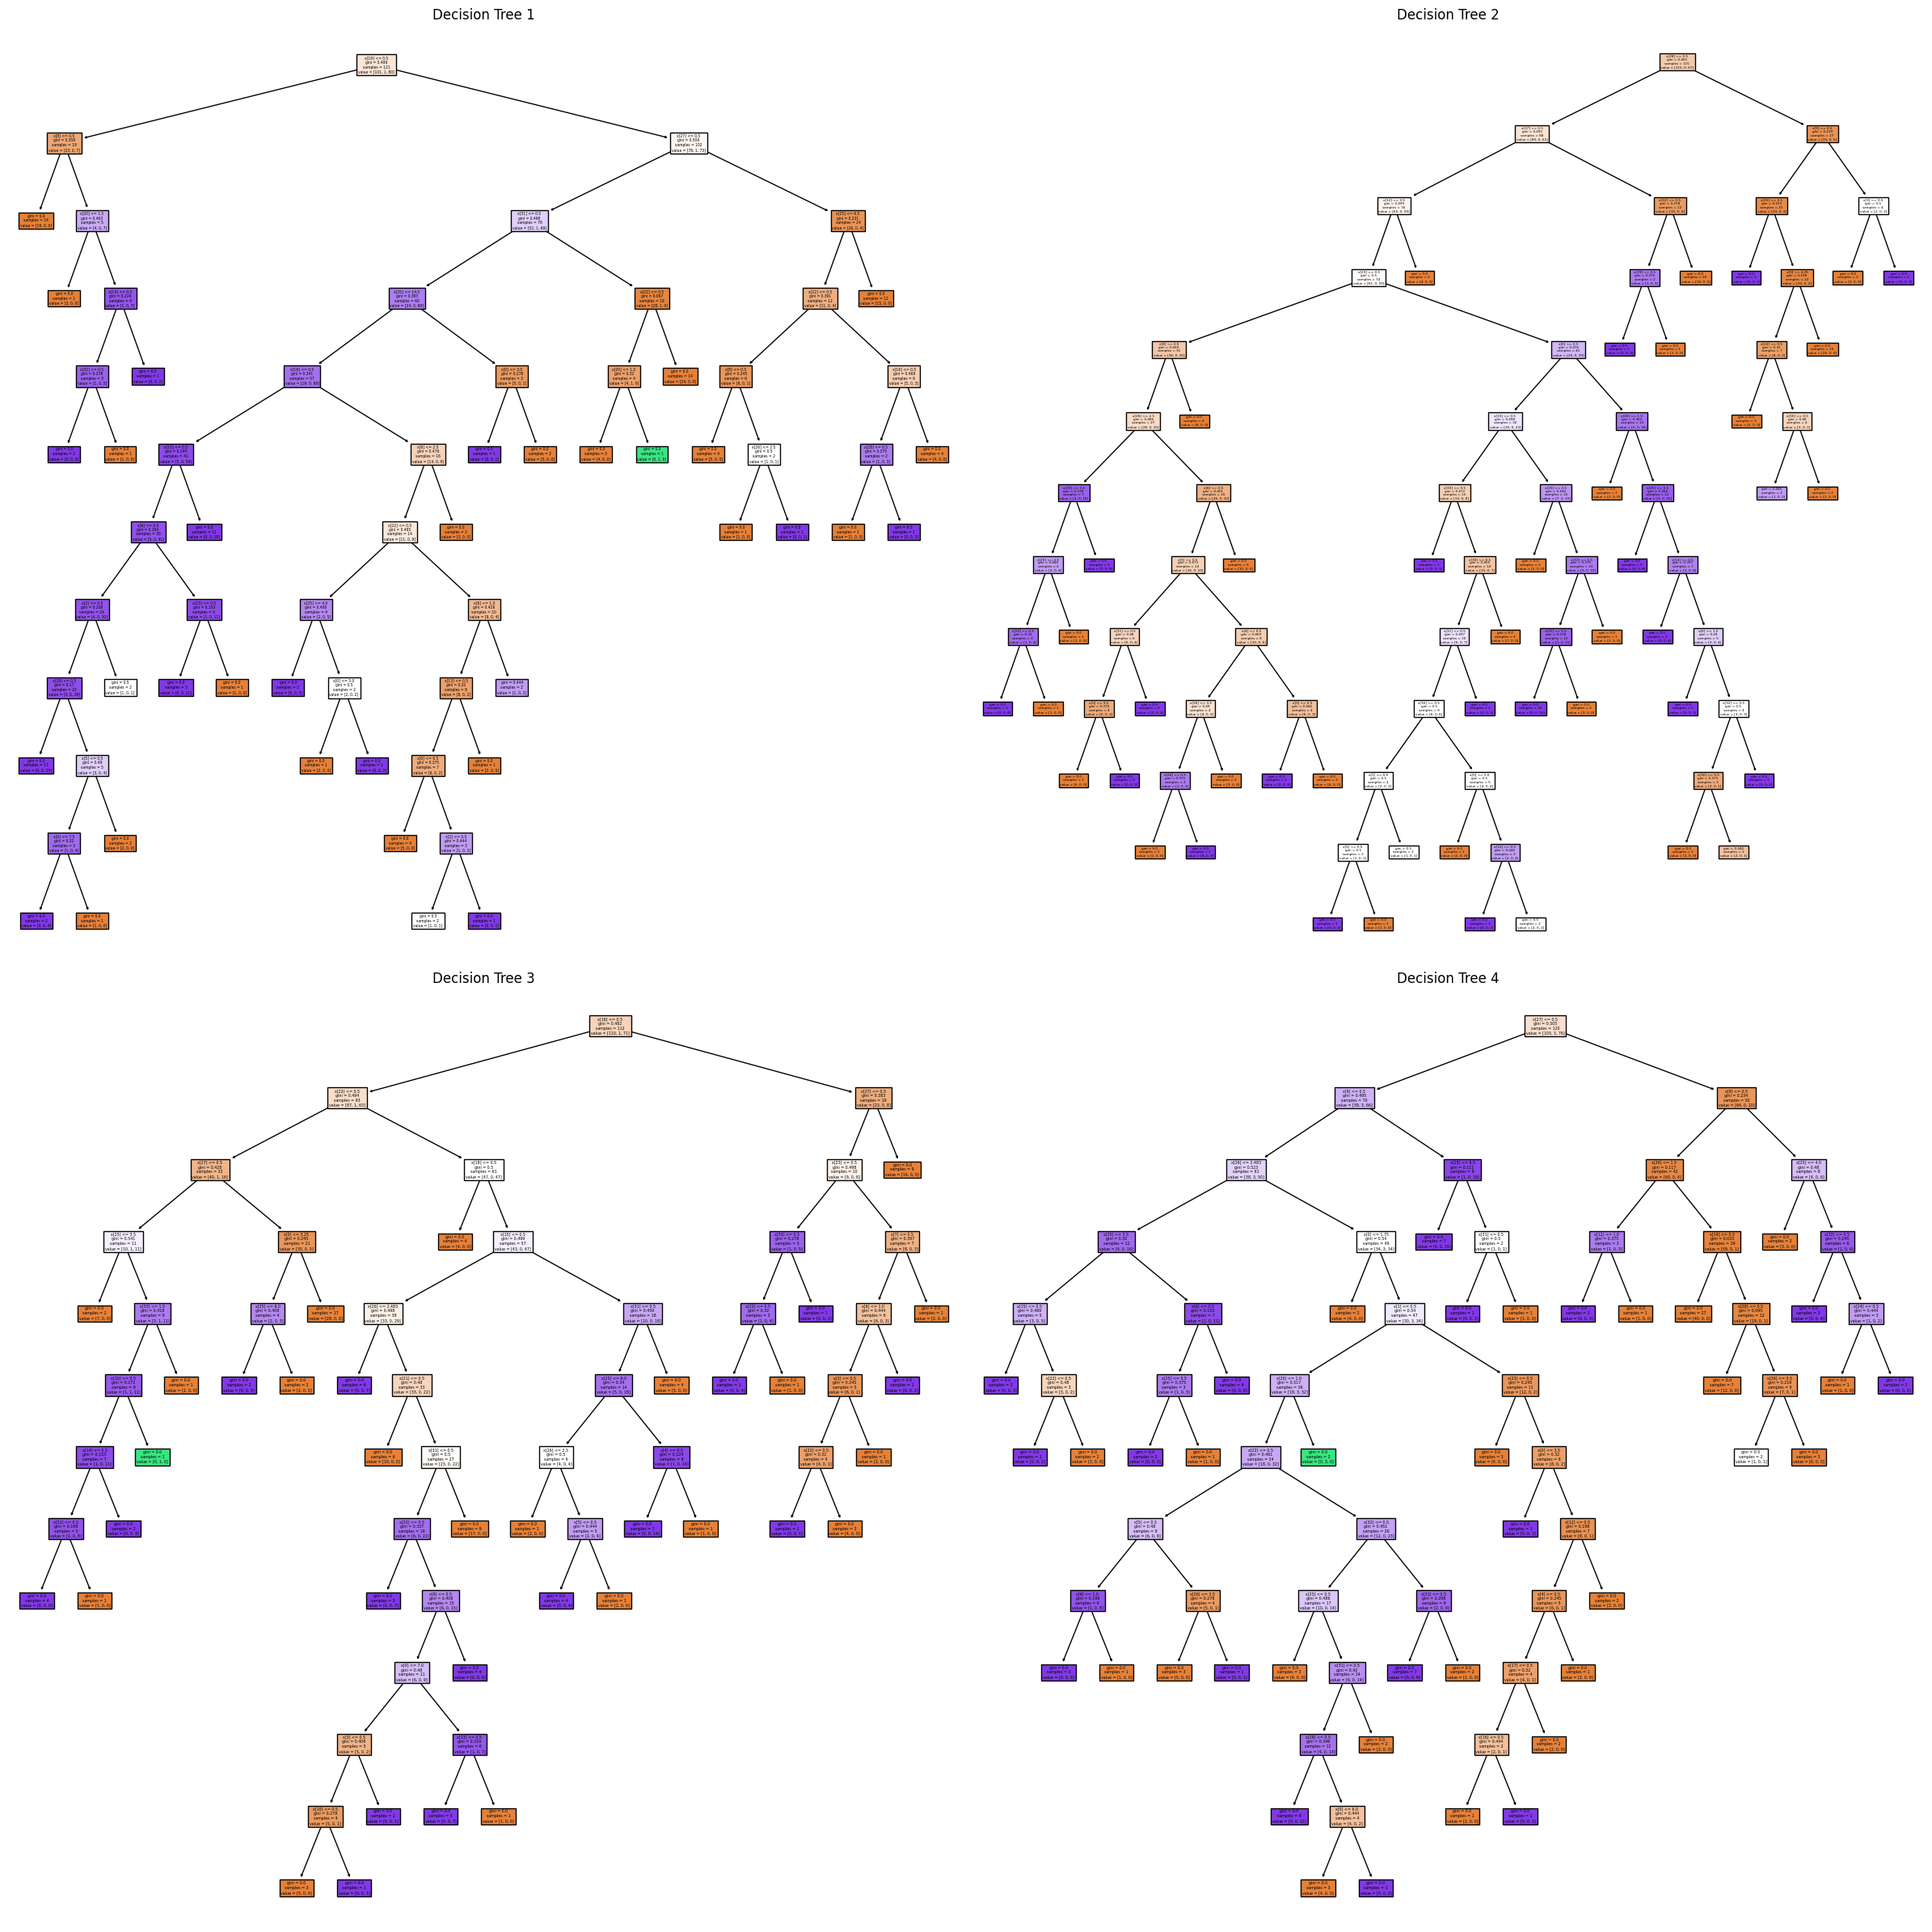

In [ ]:
#without PCA 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree


# Split the data into features (X) and target variable (y)
X = data.drop('IVF TREATMENT', axis=1) # Exclude the target variable
y = data['IVF TREATMENT'] # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)


# Define a function to make predictions on new data
def predict_ivf_treatment(new_data):
    """
    Predicts the IVF treatment using the trained Random Forest classifier.
    
    Parameters:
    new_data (pandas.DataFrame): New data to make predictions on.
    
    Returns:
    numpy.ndarray: Array of predicted IVF treatments.
    """
    return rf.predict(new_data)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity and sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("Specificity: {:.2f}".format(specificity))
print("Sensitivity: {:.2f}".format(sensitivity))

n_trees = 4 # Number of trees to visualize
n_rows = 2  # Number of rows for subplots
n_cols = n_trees // n_rows  # Number of columns for subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(24, 24))  # Increase figsize for larger tree visualizations
for i in range(n_trees):
    row = i // n_cols
    col = i % n_cols
    tree = rf.estimators_[i]
    plot_tree(tree, filled=True, ax=axes[row][col])
    axes[row][col].set_title(f"Decision Tree {i+1}")
plt.tight_layout()  # Add spacing between subplots
plt.show()


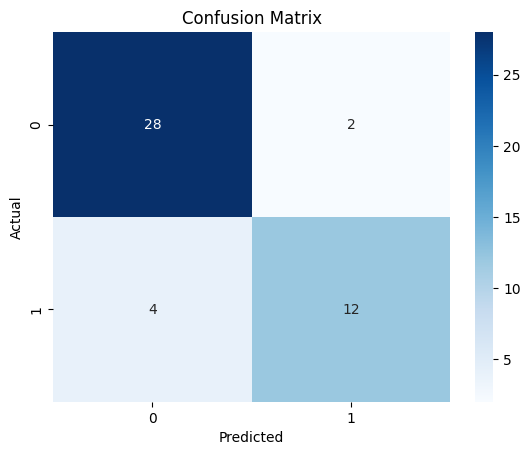

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [ ]:
#with PCA

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

# Split the data into features (X) and target variable (y)
X = data.drop('IVF TREATMENT', axis=1) # Exclude the target variable
y = data['IVF TREATMENT'] # Target variable

# Perform PCA on the feature matrix X
pca = PCA(n_components=10) 
X_pca = pca.fit_transform(X)

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42) 

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity and sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("Specificity: {:.2f}".format(specificity))
print("Sensitivity: {:.2f}".format(sensitivity))


Accuracy: 0.782608695652174
Specificity: 0.87
Sensitivity: 0.62


As we can observe that after we add PCA to the Random Forest Classifier the accuracy of the model decreases drastically from 0.86 to 0.76 i.e by 0.1. This can be because of the possible reasons: 
1. Loss of Information: Since Random forest classifier models arent very sensitive to PCA and PCA is the process of reducing dimensions of the data, this might have lead to the removal of important data. 
2. Since the real time data on our hands right now is pretty small therefore dimensional reduction techinique may lead the model to be overfitted. 

**2.SVM Prediction Model** 

In [ ]:
#without PCA

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Extract features (X) and target variable (y)
X = data.drop('IVF TREATMENT', axis=1) # Features
y = data['IVF TREATMENT'] # Target variable


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model
svm_model = SVC()

# Fit the model with the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity and sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# Print the specificity and sensitivity
print("Specificity: {:.2f}".format(specificity))
print("Sensitivity: {:.2f}".format(sensitivity))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))



Specificity: 1.00
Sensitivity: 0.00
Accuracy: 0.65


In [ ]:
#WIth PCA

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Extract features (X) and target variable (y)
X = data.drop('IVF TREATMENT', axis=1) # Features
y = data['IVF TREATMENT'] # Target variable

# Perform PCA with desired number of components
n_components = 4 # specify the number of components
pca = PCA(n_components=n_components)

# Apply PCA on the feature data (X)
X_pca = pca.fit_transform(X)

# Split the PCA-transformed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create an SVM model
svm_model = SVC()

# Fit the model with the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity and sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# Print the specificity and sensitivity
print("Specificity: {:.2f}".format(specificity))
print("Sensitivity: {:.2f}".format(sensitivity))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))


Specificity: 1.00
Sensitivity: 0.06
Accuracy: 0.67


SVM with Model ensemble i.e bagging 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Extract features (X) and target variable (y)
X = data.drop('IVF TREATMENT', axis=1) # Features
y = data['IVF TREATMENT'] # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model
svm_model = SVC()

# Create a BaggingClassifier with SVM as the base estimator
bagging_model = BaggingClassifier(estimator=svm_model, n_estimators=100, random_state=42)

# Fit the bagging model with the training data
bagging_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bagging_model.predict(X_test)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity and sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# Print the specificity and sensitivity
print("Specificity: {:.2f}".format(specificity))
print("Sensitivity: {:.2f}".format(sensitivity))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))


Specificity: 1.00
Sensitivity: 0.00
Accuracy: 0.65


**3.Gradient Boosting Classfier Model**

In [ ]:
#without PCA 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Extract features (X) and target variable (y)
X = data.drop('IVF TREATMENT', axis=1) # Features
y = data['IVF TREATMENT'] # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier()

# Fit the model with the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_model.predict(X_test)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity and sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# Print the specificity and sensitivity
print("Specificity: {:.2f}".format(specificity))
print("Sensitivity: {:.2f}".format(sensitivity))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))


Specificity: 0.93
Sensitivity: 0.75
Accuracy: 0.87


In [ ]:
#with PCA 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Extract features (X) and target variable (y)
X = data.drop('IVF TREATMENT', axis=1) # Features
y = data['IVF TREATMENT'] # Target variable

# Apply PCA for dimensionality reduction
pca = PCA(n_components=4) # Specify the number of principal components to keep
X_pca = pca.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier()

# Fit the model with the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_model.predict(X_test)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity and sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# Print the specificity and sensitivity
print("Specificity: {:.2f}".format(specificity))
print("Sensitivity: {:.2f}".format(sensitivity))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))


Specificity: 0.80
Sensitivity: 0.75
Accuracy: 0.78


In Gradient Boosting Classifier, we notice the same that the accuracy of the model decreases with the addition of Principle Component Analysis in the model. 
This decrease is characterized by the same reasons as above. 

In [ ]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Prepare the IVF dataset and split into features (X) and target variable (y)
X = data.drop('IVF TREATMENT', axis=1) # Features
y = data['IVF TREATMENT'] # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity and sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("Specificity: {:.2f}".format(specificity))
print("Sensitivity: {:.2f}".format(sensitivity))

Accuracy: 0.8478260869565217
Specificity: 0.90
Sensitivity: 0.75


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



After evaluating three classification models namely Random Forest Classifier, Support Vector Machine and Gradient Boosting Classifer. We can say that Gradient Boosting Classifier is providing us with maximum accuracy that is of 0.87. 
Where as Random forest Model accuracy isn't too bad i.e it is 0.86.
In the case of logistic regression our accuracy is 0.85 which can be made better with hyperparameter tuning. 

Therefore for our future work, we would work on improving the accuracy of these two models and due to low accuracy of SVM we are discarding that model at this stage of our project. 
